In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('all_final.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563113 entries, 0 to 563112
Data columns (total 95 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Unnamed: 0                                        563113 non-null  int64  
 1   STORE_KEY                                         563113 non-null  int64  
 2   STORE_NUMBER                                      563113 non-null  int64  
 3   STORE_NAME                                        563113 non-null  object 
 4   STORE_TYPE_NAME                                   563113 non-null  object 
 5   OPEN_DATE                                         563113 non-null  object 
 6   CLOSE_DATE                                        563113 non-null  object 
 7   BUSINESS_DATE                                     563113 non-null  object 
 8   IS_A_HOLIDAY                                      563113 non-null  int64  
 9   MONT

In [77]:
df.loc[ df[df['PROMOTION_OFFER'].isnull()].index , 'PROMOTION_OFFER'] = 'No Offers'
df.loc[ df[df['PROMOTION_ITEM'].isnull()].index , 'PROMOTION_ITEM'] = 'No Items'
df.loc[ df[df['PLATFORM'].isnull()].index , 'PLATFORM'] = 'No Platform'
df.loc[ df[df['FREQUENCY'].isnull()].index , 'FREQUENCY'] = 'None'
df.loc[ df[df['PROMOTION_COVERAGE'].isnull()].index , 'PROMOTION_COVERAGE'] = 'None'

In [78]:
dates = ['OPEN_DATE','CLOSE_DATE','BUSINESS_DATE','STORE_LIVE_DATE','DISPATCH_GO_LIVE_DATE','DOOR_DASH_GO_LIVE_DATE','DOOR_DASH_MARKUP_GO_LIVE_DATE','UBER_EATS_MARKUP_DATE']
for date in dates:
    df[date] = pd.to_datetime(df[date])

In [79]:
categorical_columns = ['STORE_TYPE_NAME' , 'CITY_NAME' , 'STATE_CODE' , 'STATE_NAME' , 'TIME_ZONE_NAME', 'DMA_NAME', 'STORE_STATUS', 'REGION_NAME', 'STORE_FUNCTIONAL_STATUS',
                       'GLOBAL_REGION_NAME', 'GLOBAL_REGION_STORE_TYPE_NAME', 'AREA_REGION', 'STORE_CONCEPT_NAME']
for i in categorical_columns:
  df[i] = df[i].astype('category')

In [80]:
df['STORE_KEY'] = df['STORE_KEY'].astype('int32')
df['STORE_NUMBER'] = df['STORE_NUMBER'].astype('int16')
df['DMA_ID'] = df['DMA_ID'].astype('int16')
df['REGION_ID'] = df['REGION_ID'].astype('int8')
df['TEMP_CLOSE_INDICATOR'] = df['TEMP_CLOSE_INDICATOR'].astype('int8')
df['PROJECTION_INCLUDED_INDICATOR'] = df['PROJECTION_INCLUDED_INDICATOR'].astype('int8')
df['BUSINESS_DATE_FISCAL_DAY_OF_YEAR'] = df['BUSINESS_DATE_FISCAL_DAY_OF_YEAR'].astype('int16')
df['BUSINESS_DATE_FISCAL_YEAR'] = df['BUSINESS_DATE_FISCAL_YEAR'].astype('int16')
df['COMP_BUSINESS_DATE_FISCAL_YEAR'] = df['COMP_BUSINESS_DATE_FISCAL_YEAR'].astype('int16')
df['COMPARABLE_INDICATOR'] = df['COMPARABLE_INDICATOR'].astype('int8')
df['TRANSACTION_FINAL_COUNT'] = df['TRANSACTION_FINAL_COUNT'].astype('int16')
df['NET_SALES_FINAL_USD_AMOUNT'] = df['NET_SALES_FINAL_USD_AMOUNT'].astype('int16')
df['PY_TRANSACTION_FINAL_COUNT'] = df['PY_TRANSACTION_FINAL_COUNT'].astype('int16')
df['PY_NET_SALES_FINAL_USD_AMOUNT'] = df['PY_NET_SALES_FINAL_USD_AMOUNT'].astype('int16')
df['PROMOTION_CASH_AMOUNT'] = df['PROMOTION_CASH_AMOUNT'].astype('int8')

In [81]:
categorical_columns1 = ['PROMOTION_TYPE', 'PROMOTION_OFFER', 'PROMOTION_ITEM', 'PLATFORM' , 'FREQUENCY', 'PROMOTION_COVERAGE']
for i in categorical_columns1:
  df[i] = df[i].astype('category')

In [82]:
df['PROMOTION_PERCENTAGE'] = pd.to_numeric(df['PROMOTION_PERCENTAGE'], downcast='float')
df['PRIOR_STORE_NUMBER'] = df['PRIOR_STORE_NUMBER'].astype('int8')

In [83]:
pd.set_option('display.max_columns', None)  

In [84]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [85]:
df.head(10)

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,BUSINESS_DATE,IS_A_HOLIDAY,MONTH_NAME,DAY_NAME,SEASON_NAME,YEAR,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_NAME,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_TRANSACTION_SALES,ROLLING_WINDOW_OF_7_DAYS,ROLLING_WINDOW_OF_14_DAYS,ROLLING_WINDOW_OF_30_DAYS,ROLLING_WINDOW_OF_60_DAYS,ROLLING_WINDOW_OF_90_DAYS,ROLLING_WINDOW_OF_180_DAYS,ROLLING_WINDOW_OF_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PY_PER_TRANSACTION_SALES,SALES_ROLLING_WINDOW_7_DAYS,PY_SALES_ROLLING_WINDOW_14_DAYS,PY_SALES_ROLLING_WINDOW_30_DAYS,PY_SALES_ROLLING_WINDOW_60_DAYS,PY_SALES_ROLLING_WINDOW_90_DAYS,PY_SALES_ROLLING_WINDOW_180_DAYS,PY_SALES_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_COVERAGE
0,825,2,TX2,FRANCHISE,1998-05-09,1999-12-31,2019-04-23,0,April,Tuesday,Spring,2019,IRVING,TX,TEXAS,CENTRAL,623,DALLAS-FT. WORTH,ACTIVE,1,SOUTHWEST,0,1998-05-09,OPERATIONAL,Domestic,DOMESTICFRANCHISE,DALLAS-FT. WORTH,2019-04-17,2019-04-17,2020-09-27,ORIGINAL,2022-07-20,0,0,115,2019,2018,0,109,1809,16.596330,1809,1809,1809,1809,1809,1809,1809,109,109,109,109,109,109,16.596330,16.596330,16.596330,16.596330,16.596330,16.596330,16.596330,109,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Promotion,No Offers,No Items,0,0.0,No Platform,None,None
1,825,2,TX2,FRANCHISE,1998-05-09,1999-12-31,2019-04-24,0,April,Wednesday,Spring,2019,IRVING,TX,TEXAS,CENTRAL,623,DALLAS-FT. WORTH,ACTIVE,1,SOUTHWEST,0,1998-05-09,OPERATIONAL,Domestic,DOMESTICFRANCHISE,DALLAS-FT. WORTH,2019-04-17,2019-04-17,2020-09-27,ORIGINAL,2022-07-20,0,0,116,2019,2018,0,93,1465,15.752688,1637,1637,1637,1637,1637,1637,1637,101,101,101,101,101,101,16.174510,16.174510,16.174510,16.174510,16.174510,16.174510,16.174510,101,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Promotion,No Offers,No Items,0,0.0,No Platform,None,None
2,825,2,TX2,FRANCHISE,1998-05-09,1999-12-31,2019-04-25,0,April,Thursday,Spring,2019,IRVING,TX,TEXAS,CENTRAL,623,DALLAS-FT. WORTH,ACTIVE,1,SOUTHWEST,0,1998-05-09,OPERATIONAL,Domestic,DOMESTICFRANCHISE,DALLAS-FT. WORTH,2019-04-17,2019-04-17,2020-09-27,ORIGINAL,2022-07-20,0,0,117,2019,2018,0,151,2429,1

In [86]:
columns = ['ROLLING_WINDOW_OF_7_DAYS','ROLLING_WINDOW_OF_14_DAYS','ROLLING_WINDOW_OF_30_DAYS','ROLLING_WINDOW_OF_60_DAYS',
          'ROLLING_WINDOW_OF_90_DAYS','ROLLING_WINDOW_OF_180_DAYS','ROLLING_WINDOW_OF_365_DAYS','TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS',
          'TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS', 'TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS', 'TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS',
          'TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS', 'TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS','SALES_ROLLING_WINDOW_7_DAYS',
          'PY_SALES_ROLLING_WINDOW_14_DAYS', 'PY_SALES_ROLLING_WINDOW_30_DAYS', 'PY_SALES_ROLLING_WINDOW_60_DAYS', 'PY_SALES_ROLLING_WINDOW_90_DAYS',
          'PY_SALES_ROLLING_WINDOW_180_DAYS', 'PY_SALES_ROLLING_WINDOW_365_DAYS','PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS', 
          'PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS', 'PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS', 'PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS',
          'PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS', 'PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS' ,'PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS']

In [87]:
for column in columns:
    df[column] = df[column].astype('int16')

In [88]:
df['IS_A_HOLIDAY'] = df['IS_A_HOLIDAY'].astype('int8')

In [89]:
df['MONTH_NAME'] = df['MONTH_NAME'].astype('category')
df['DAY_NAME'] = df['DAY_NAME'].astype('category')
df['SEASON_NAME'] = df['SEASON_NAME'].astype('category')

In [90]:
column = ['PER_TRANSACTION_SALES', 'PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS', 'PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS',
          'PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS', 'PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS', 
          'PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS', 'PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS', 'PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS',
          'PY_PER_TRANSACTION_SALES', 'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS' ,'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS',
          'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS', 'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS', 'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS',
          'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS' , 'PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS']
for col in column:
    df[column] = df[column].astype('float32')

In [91]:
df['TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS'] = df['TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS'].astype('int16')

In [92]:
la_stores = df[(df['DMA_NAME'] == 'LOS ANGELES') & (df['CITY_NAME'] == 'LOS ANGELES')]['STORE_NUMBER'].unique()
la_stores

array([ 443,  494,  584,  672, 1415, 1752, 2301, 2311, 2364], dtype=int16)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563113 entries, 0 to 563112
Data columns (total 94 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   STORE_KEY                                         563113 non-null  int32         
 1   STORE_NUMBER                                      563113 non-null  int16         
 2   STORE_NAME                                        563113 non-null  object        
 3   STORE_TYPE_NAME                                   563113 non-null  category      
 4   OPEN_DATE                                         563113 non-null  datetime64[ns]
 5   CLOSE_DATE                                        563113 non-null  datetime64[ns]
 6   BUSINESS_DATE                                     563113 non-null  datetime64[ns]
 7   IS_A_HOLIDAY                                      563113 non-null  int8          
 8   MONTH_NAME    

In [ ]:
### LOS ANGELES DMA DATA ANALYSIS -> 

In [22]:
def yearwise_growth(store_number):
    dataframe = df[df['STORE_NUMBER'] == store_number].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
    dataframe['Growth'] = dataframe['NET_SALES_FINAL_USD_AMOUNT'].pct_change() * 100
    sns.lineplot(data = df[df['STORE_NUMBER'] == store_number].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
    plt.title(f'{store_number}with sales')
    plt.show()
    return dataframe.fillna(0)

In [533]:
random_choice = np.random.choice(la_stores)
random_choice

443

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


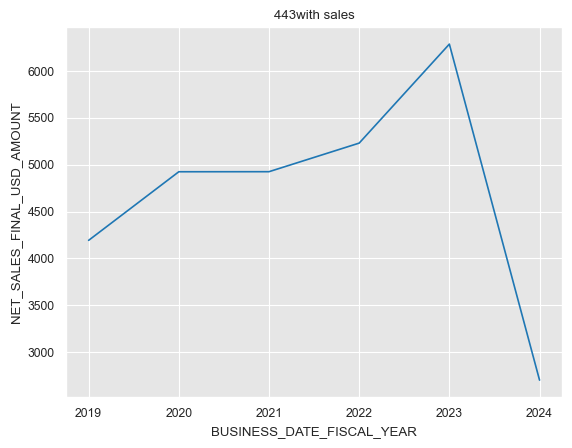

,BUSINESS_DATE_FISCAL_YEAR,NET_SALES_FINAL_USD_AMOUNT,Growth
0,2019,4192.584000,0.000000
1,2020,4925.063187,17.470829
2,2021,4925.692308,0.012774
3,2022,5230.924528,6.196737
4,2023,6288.076923,20.209666
5,2024,2700.000000,-57.061594


In [534]:
yearwise_growth(random_choice)

In [24]:
df[(df['STORE_NUMBER'].isin(la_stores))].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean()

BUSINESS_DATE_FISCAL_YEAR
2019    5032.938400
2020    6021.369952
2021    5957.561813
2022    6112.803684
2023    6803.352221
2024    6808.555556
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [30]:
hehe = df[(df['STORE_NUMBER'].isin(la_stores))].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
hehe['Growth'] = hehe['NET_SALES_FINAL_USD_AMOUNT'].pct_change() * 100
hehe.fillna(0)

,BUSINESS_DATE_FISCAL_YEAR,NET_SALES_FINAL_USD_AMOUNT,Growth
0,2019,5032.938400,0.000000
1,2020,6021.369952,19.639254
2,2021,5957.561813,-1.059695
3,2022,6112.803684,2.605795
4,2023,6803.352221,11.296756
5,2024,6808.555556,0.076482


C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE_FISCAL_YEAR', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

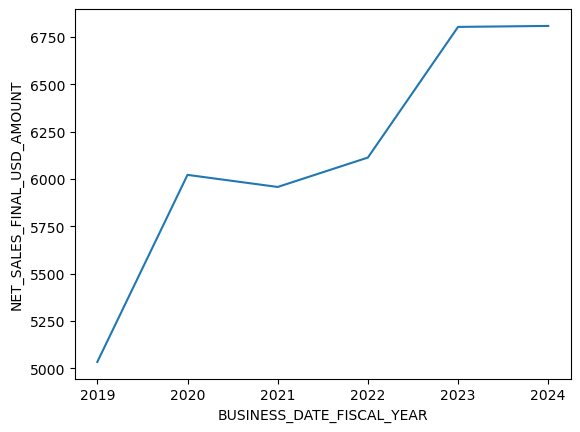

In [31]:
sns.lineplot(data = hehe,
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')

In [32]:
data = df[df['STORE_NUMBER'].isin(la_stores)].groupby(['MONTH_NAME','BUSINESS_DATE_FISCAL_YEAR'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
data

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1851197569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df[df['STORE_NUMBER'].isin(la_stores)].groupby(['MONTH_NAME','BUSINESS_DATE_FISCAL_YEAR'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()


,MONTH_NAME,BUSINESS_DATE_FISCAL_YEAR,NET_SALES_FINAL_USD_AMOUNT
0,April,2019,4468.850000
1,April,2020,6495.040000
2,April,2021,6309.916667
3,April,2022,5860.800000
4,April,2023,6784.606635
...,...,...,...
67,September,2020,6588.086667
68,September,2021,5903.644444
69,September,2022,6624.255556
70,September,2023,7026.096296


C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


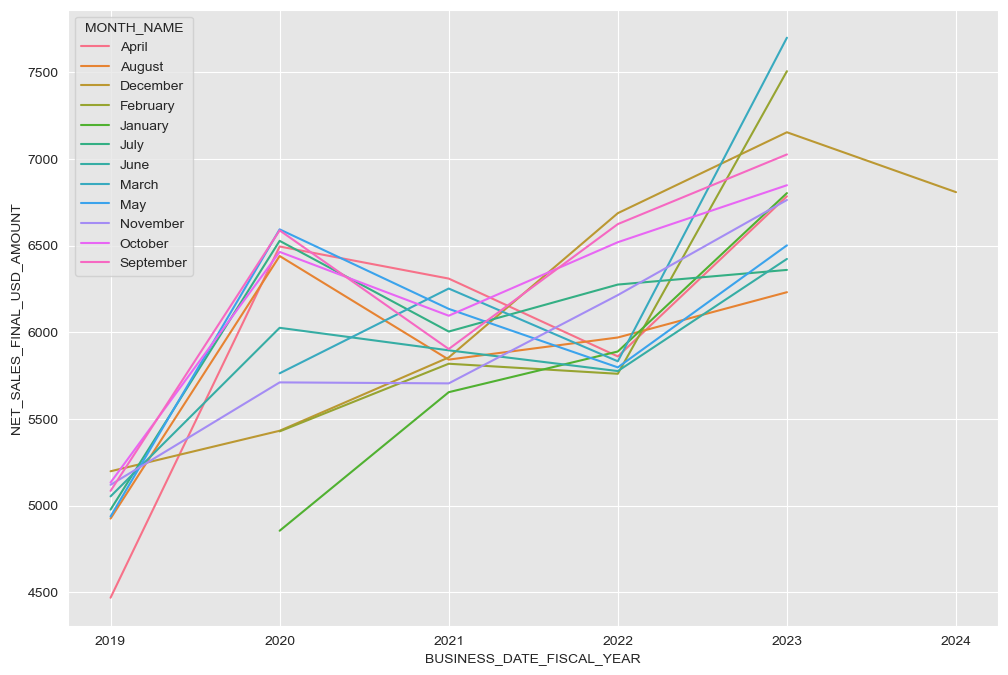

In [42]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data,
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT',
             hue = 'MONTH_NAME')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

In [43]:
df_stores = df[df['STORE_NUMBER'].isin(la_stores)].groupby(df[df['STORE_NUMBER'].isin(la_stores)]['BUSINESS_DATE'].dt.year).apply(lambda x: x.nlargest(10, 'NET_SALES_FINAL_USD_AMOUNT'))[['STORE_NAME','NET_SALES_FINAL_USD_AMOUNT','BUSINESS_DATE','MONTH_NAME','DAY_NAME','PROMOTION_TYPE','PROMOTION_OFFER',
                                                                                                                          'PROMOTION_ITEM','PROMOTION_CASH_AMOUNT','PROMOTION_PERCENTAGE','PLATFORM','FREQUENCY',
                                                                                                                          'PROMOTION_COVERAGE']] 
df_stores

STORE_NAME  NET_SALES_FINAL_USD_AMOUNT BUSINESS_DATE  \
BUSINESS_DATE                                                               
2019          170000      CA584                       11312    2019-11-02   
              170059      CA584                       10749    2019-12-31   
              169833      CA584                       10544    2019-05-19   
              170001      CA584                       10503    2019-11-03   
              169904      CA584                       10358    2019-07-29   
              170043      CA584                       10349    2019-12-15   
              170022      CA584                       10305    2019-11-24   
              170008      CA584                       10237    2019-11-10   
              169966      CA584                       10157    2019-09-29   
              169952      CA584                       10155    2019-09-15   
2020          170092      CA584                       15863    2020-02-02   
              418058     CA1415                       12146    2020-10-02   
              418023     CA1415                       11915    2020-08-28   
              418067     CA1415                       11618    2020-10-11   
              417890     CA1415                       11558    2020-04-17   
              418065     CA1415                       11525    2020-10-09   
              417996     CA1415                       11479    2020-08-01   
              418030     CA1415                       11418    2020-09-04   
              418087     CA1415                       11113    2020-10-31   
              170425      CA584                       11065    2020-12-31   
2021          170463      CA584                       16302    2021-02-07   
              418186     CA1415                       13817    2021-02-07   
              170687      CA584                       12377    2021-09-19   
              170790      CA584                       12069    2021-12-31   
              196665      CA672                       11641    2021-02-07   
              504323     CA1752                       11247    2021-02-07   
              170582      CA584                       11205    2021-06-06   
              170680      CA584                       11106    2021-09-12   
              418226     CA1415                       10877    2021-03-19   
              170762      CA584                       10732    2021-12-03   
2022          170834      CA584                       22134    2022-02-13   
              170820      CA584                       15474    2022-01-30   
              171036      CA584                       14205    2022-09-03   
              171044      CA584                       12735    2022-09-11   
              171037      CA584                       12529    2022-09-04   
              171000      CA584                       12468    2022-07-29   
              171034      CA584                       12180    2022-09-01   
              418758     CA1415                       12170    2022-09-02   
              170986      CA584                       12111    2022-07-15   
              171113      CA584                       11765    2022-11-19   
2023          171198      CA584                       23849    2023-02-12   
              558435     CA2301                       16600    2023-09-30   
              418921     CA1415                       16158    2023-02-12   
              505058     CA1752                       15369    2023-02-12   
              558436     CA2301                       15046    2023-10-01   
              171267      CA584                       14808    2023-04-22   
              171184      CA584                       14770    2023-01-29   
              197400      CA672                       14649    2023-02-12   
              558434     CA2301                       14492    2023-09-29   
              171428      CA584                       14466    2023-09-30   

                

In [120]:
df1 = df.copy()

In [121]:
df.set_index('BUSINESS_DATE',inplace = True)

In [159]:
df[df['STORE_NUMBER'].isin(la_stores)]['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean()

BUSINESS_DATE
2019-06-30    4933.518841
2019-09-30    4994.930435
2019-12-31    5158.369565
2020-03-31    5347.248352
2020-06-30    6374.050549
2020-09-30    6517.863043
2020-12-31    5859.306773
2021-03-31    5911.585185
2021-06-30    6113.930403
2021-09-30    5917.018116
2021-12-31    5912.438406
2022-03-31    5829.783333
2022-06-30    5811.501832
2022-09-30    6286.291667
2022-12-31    6511.581522
2023-03-31    7330.566667
2023-06-30    6560.135908
2023-09-30    6539.711610
2023-12-31    6919.940821
Freq: Q-DEC, Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

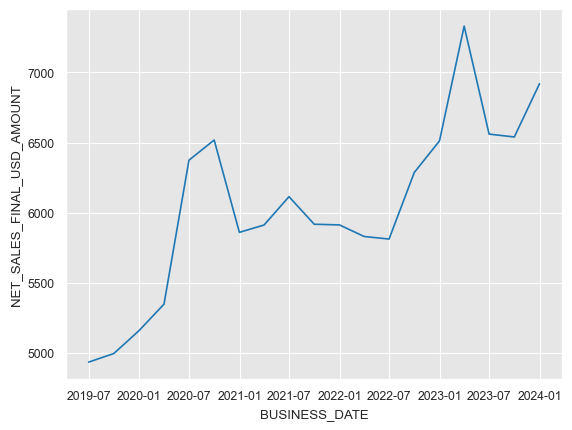

In [161]:
sns.lineplot(data = df[df['STORE_NUMBER'].isin(la_stores)]['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index(),
             x = 'BUSINESS_DATE',
             y = 'NET_SALES_FINAL_USD_AMOUNT')

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

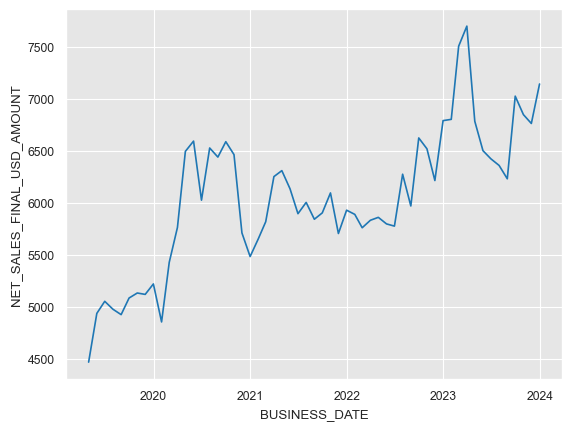

In [163]:
sns.lineplot(data = df[df['STORE_NUMBER'].isin(la_stores)]['NET_SALES_FINAL_USD_AMOUNT'].resample('M').mean().reset_index(),
             x = 'BUSINESS_DATE',
             y = 'NET_SALES_FINAL_USD_AMOUNT')

In [ ]:
hehe = df1['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index()

In [ ]:
hehe1 = df1['TRANSACTION_FINAL_COUNT'].resample('Q').mean().reset_index()

In [166]:
merged = pd.merge(how = 'inner',
                left = hehe,
                right = hehe1,
                 on = 'BUSINESS_DATE')

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


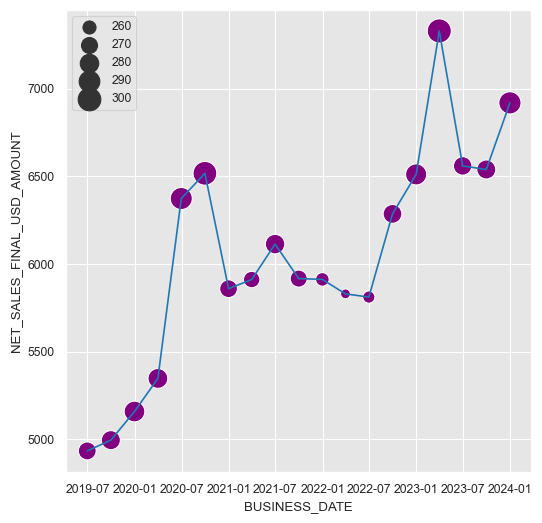

In [169]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = merged, 
                 x = 'BUSINESS_DATE',
                 y = 'NET_SALES_FINAL_USD_AMOUNT',
                 size = 'TRANSACTION_FINAL_COUNT',
                 sizes = (50,300), 
                 color = 'purple')
sns.lineplot(data = merged, 
                 x = 'BUSINESS_DATE',
                 y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.show()

In [139]:
holidays_and_events_2019 = [
    '2019-01-01',  # New Year's Day
    '2019-01-21',  # Martin Luther King Jr. Day
    '2019-02-03',  # Super Bowl Sunday
    '2019-02-14',  # Valentine's Day
    '2019-02-18',  # Presidents' Day
    '2019-03-17',  # St. Patrick's Day
    '2019-04-21',  # Easter Sunday
    '2019-05-12',  # Mother's Day
    '2019-05-27',  # Memorial Day
    '2019-06-16',  # Father's Day
    '2019-07-04',  # Independence Day
    '2019-09-02',  # Labor Day
    '2019-10-14',  # Columbus Day
    '2019-10-31',  # Halloween
    '2019-11-11',  # Veterans Day
    '2019-11-28',  # Thanksgiving Day
    '2019-11-29',  # Black Friday
    '2019-11-30',  # Small Business Saturday
    '2019-12-02',  # Cyber Monday
    '2019-12-24',  # Christmas Eve
    '2019-12-25',  # Christmas Day
    '2019-12-31'   # New Year's Eve
]
holidays_and_events_2020 = [
    '2020-01-01',  # New Year's Day
    '2020-01-20',  # Martin Luther King Jr. Day
    '2020-02-02',  # Super Bowl Sunday
    '2020-02-14',  # Valentine's Day
    '2020-02-17',  # Presidents' Day
    '2020-03-17',  # St. Patrick's Day
    '2020-04-12',  # Easter Sunday
    '2020-05-10',  # Mother's Day
    '2020-05-25',  # Memorial Day
    '2020-06-21',  # Father's Day
    '2020-07-04',  # Independence Day
    '2020-09-07',  # Labor Day
    '2020-10-12',  # Columbus Day
    '2020-10-31',  # Halloween
    '2020-11-11',  # Veterans Day
    '2020-11-26',  # Thanksgiving Day
    '2020-11-27',  # Black Friday
    '2020-11-28',  # Small Business Saturday
    '2020-11-30',  # Cyber Monday
    '2020-12-24',  # Christmas Eve
    '2020-12-25',  # Christmas Day
    '2020-12-31'   # New Year's Eve
]

holidays_and_events_2021 = [
    '2021-01-01',  # New Year's Day
    '2021-01-18',  # Martin Luther King Jr. Day
    '2021-02-07',  # Super Bowl Sunday
    '2021-02-14',  # Valentine's Day
    '2021-02-15',  # Presidents' Day
    '2021-03-17',  # St. Patrick's Day
    '2021-04-04',  # Easter Sunday
    '2021-05-09',  # Mother's Day
    '2021-05-31',  # Memorial Day
    '2021-06-20',  # Father's Day
    '2021-07-04',  # Independence Day
    '2021-09-06',  # Labor Day
    '2021-10-11',  # Columbus Day
    '2021-10-31',  # Halloween
    '2021-11-11',  # Veterans Day
    '2021-11-25',  # Thanksgiving Day
    '2021-11-26',  # Black Friday
    '2021-11-27',  # Small Business Saturday
    '2021-11-29',  # Cyber Monday
    '2021-12-24',  # Christmas Eve
    '2021-12-25',  # Christmas Day
    '2021-12-31'   # New Year's Eve
]

holidays_and_events_2022 = [
    '2022-01-01',  # New Year's Day
    '2022-01-17',  # Martin Luther King Jr. Day
    '2022-02-13',  # Super Bowl Sunday
    '2022-02-14',  # Valentine's Day
    '2022-02-21',  # Presidents' Day
    '2022-03-17',  # St. Patrick's Day
    '2022-04-17',  # Easter Sunday
    '2022-05-08',  # Mother's Day
    '2022-05-30',  # Memorial Day
    '2022-06-19',  # Father's Day
    '2022-07-04',  # Independence Day
    '2022-09-05',  # Labor Day
    '2022-10-10',  # Columbus Day
    '2022-10-31',  # Halloween
    '2022-11-11',  # Veterans Day
    '2022-11-24',  # Thanksgiving Day
    '2022-11-25',  # Black Friday
    '2022-11-26',  # Small Business Saturday
    '2022-11-28',  # Cyber Monday
    '2022-12-24',  # Christmas Eve
    '2022-12-25',  # Christmas Day
    '2022-12-31'   # New Year's Eve
]

holidays_and_events_2023 = [
    '2023-01-01',  # New Year's Day
    '2023-01-16',  # Martin Luther King Jr. Day
    '2023-02-12',  # Super Bowl Sunday
    '2023-02-14',  # Valentine's Day
    '2023-02-20',  # Presidents' Day
    '2023-03-17',  # St. Patrick's Day
    '2023-04-09',  # Easter Sunday
    '2023-05-14',  # Mother's Day
    '2023-05-29',  # Memorial Day
    '2023-06-18',  # Father's Day
    '2023-07-04',  # Independence Day
    '2023-09-04',  # Labor Day
    '2023-10-09',  # Columbus Day
    '2023-10-31',  # Halloween
    '2023-11-11',  # Veterans Day
    '2023-11-23',  # Thanksgiving Day
    '2023-11-24',  # Black Friday
    '2023-11-25',  # Small Business Saturday
    '2023-11-27',  # Cyber Monday
    '2023-12-24',  # Christmas Eve
    '2023-12-25',  # Christmas Day
    '2023-12-31'   # New Year's Eve
]
# Convert to datetime
all_holidays_and_events = holidays_and_events_2019.copy()
all_holidays_and_events.extend(holidays_and_events_2020)
all_holidays_and_events.extend(holidays_and_events_2021)
all_holidays_and_events.extend(holidays_and_events_2022)
all_holidays_and_events.extend(holidays_and_events_2023)
all_holidays_and_events = pd.DatetimeIndex(all_holidays_and_events)

In [172]:
data = df1[df1['STORE_NUMBER'].isin(la_stores)]

In [173]:
holidays = data[data['BUSINESS_DATE'].isin(all_holidays_and_events)][['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()

In [174]:
holidays.rename(columns = {'index' : 'COUNT' , 0 : 'MEAN'}, inplace = True)

In [175]:
holidays

,COUNT,MEAN
0,TRANSACTION_FINAL_COUNT,236.707472
1,NET_SALES_FINAL_USD_AMOUNT,5474.046105
2,PY_TRANSACTION_FINAL_COUNT,181.394277
3,PY_NET_SALES_FINAL_USD_AMOUNT,3931.062003


In [176]:
not_holidays = data[~data['BUSINESS_DATE'].isin(all_holidays_and_events)][['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()

In [177]:
not_holidays.rename(columns = {'index' : 'COUNT' , 0 : 'MEAN'}, inplace = True)
not_holidays

,COUNT,MEAN
0,TRANSACTION_FINAL_COUNT,284.957770
1,NET_SALES_FINAL_USD_AMOUNT,6166.477962
2,PY_TRANSACTION_FINAL_COUNT,203.127819
3,PY_NET_SALES_FINAL_USD_AMOUNT,4269.305658


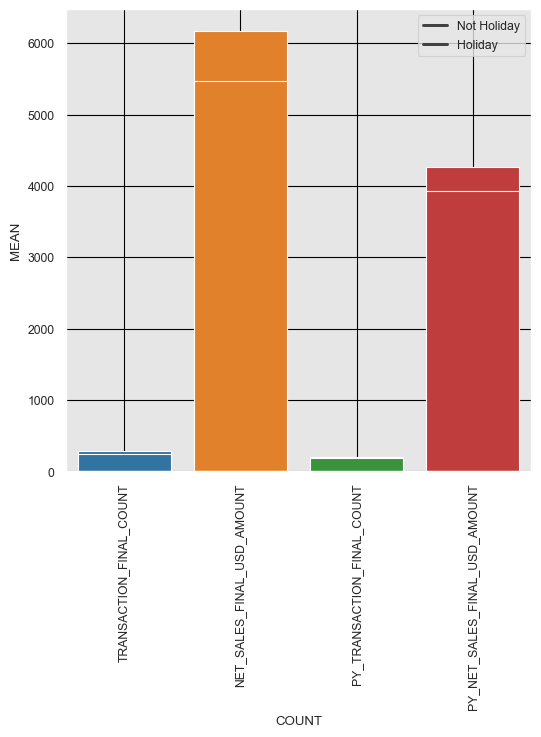

In [183]:
plt.figure( figsize = (6,6))
sns.barplot( data = not_holidays,
            x = 'COUNT',
            y = 'MEAN',
           label = 'Not Holiday')
plt.xticks(rotation = 90)
sns.barplot( data = holidays,
            x = 'COUNT',
            y = 'MEAN',
           label = 'Holiday')
plt.legend(['Not Holiday', 'Holiday'])
plt.grid(True, color = 'black') 

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\959663395.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

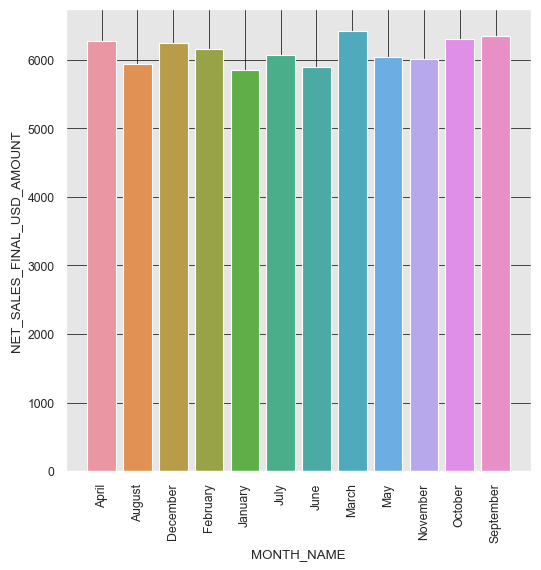

In [184]:
plt.figure(figsize = (6,6))
sns.barplot( data = data.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='-', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

In [185]:
data_2019 = df[df['YEAR'] == 2019]

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\2093460039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data_2019.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

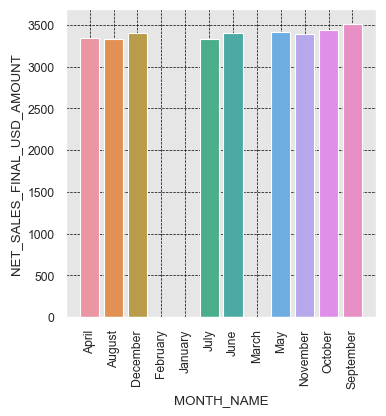

In [188]:
plt.figure(figsize = (4,4))
sns.barplot( data = data_2019.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3929306792.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2020].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

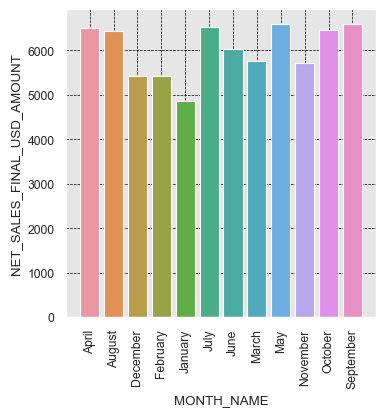

In [190]:
plt.figure(figsize = (4,4))
sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2020].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\761651616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2021].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

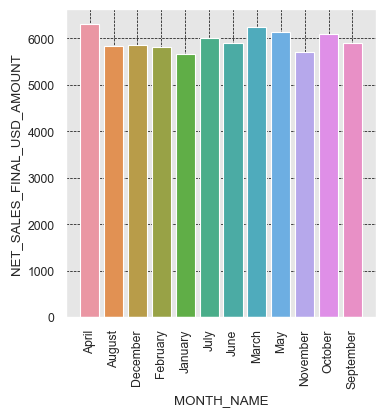

In [191]:
plt.figure(figsize = (4,4))
sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2021].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\2813965150.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2022].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

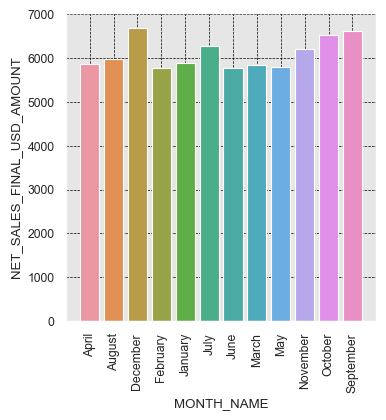

In [192]:
plt.figure(figsize = (4,4))
sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2022].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\857416163.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2023].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

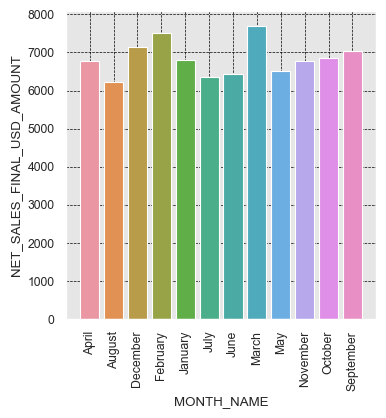

In [193]:
plt.figure(figsize = (4,4))
sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2023].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\461413914.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2024].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[]

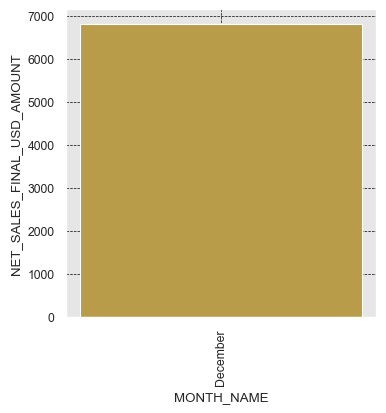

In [194]:
plt.figure(figsize = (4,4))
sns.barplot( data = data[data['BUSINESS_DATE_FISCAL_YEAR'] == 2024].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

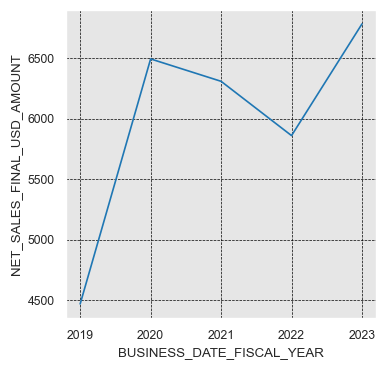

In [212]:
plt.figure(figsize = (4,4))
sns.lineplot(data = data[data['MONTH_NAME'] == 'April'].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.plot()

In [215]:
analysis_holidays = data.groupby(['BUSINESS_DATE_FISCAL_YEAR','IS_A_HOLIDAY'])[['TRANSACTION_FINAL_COUNT', 'NET_SALES_FINAL_USD_AMOUNT', 'PY_TRANSACTION_FINAL_COUNT', 'PY_NET_SALES_FINAL_USD_AMOUNT']].mean()
analysis_holidays

TRANSACTION_FINAL_COUNT  \
BUSINESS_DATE_FISCAL_YEAR IS_A_HOLIDAY                            
2019                      0                          287.894068   
                          1                          215.814286   
2020                      0                          294.794945   
                          1                          242.034483   
2021                      0                          275.473197   
                          1                          235.121212   
2022                      0                          273.004789   
                          1                          232.478261   
2023                      0                          293.799629   
                          1                          246.658537   
2024                      1                          237.333333   

                                        NET_SALES_FINAL_USD_AMOUNT  \
BUSINESS_DATE_FISCAL_YEAR IS_A_HOLIDAY                               
2019                      0                            5099.809322   
                          1                            3905.685714   
2020                      0                            6078.928777   
                          1                            5157.491379   
2021                      0                            5987.718811   
                          1                            5488.757576   
2022                      0                            6143.044061   
                          1                            5655.253623   
2023                      0                            6844.339147   
                          1                            6129.817073   
2024                      1                            6808.555556   

                                        PY_TRANSACTION_FINAL_COUNT  \
BUSINESS_DATE_FISCAL_YEAR IS_A_HOLIDAY                               
2019                      0                               0.000000   
                          1                               0.000000   
2020                      0                             193.326824   
                          1                             157.241379   
2021                      0                             249.689084   
                          1                             216.287879   
2022                      0                             274.429119   
                          1                             248.311594   
2023                      0                             207.704267   
                          1                             191.371951   
2024                      1                             183.888889   

                                        PY_NET_SALES_FINAL_USD_AMOUNT  
BUSINESS_DATE_FISCAL_YEAR IS_A_HOLIDAY                                 
2019                      0                                  0.000000  
                          1                                  0.000000  
2020                      0                               3423.321654  
                          1                               2854.913793  
2021                      0                               5158.830409  
                          1                               4450.886364  
2022                      0                               5988.454502  
                          1                               5587.028986  
2023                      0                               4675.892393  
                          1                               4524.286585  
2024                      1                               4550.888889

In [216]:
analysis_holidays.unstack()['TRANSACTION_FINAL_COUNT'].reset_index()

IS_A_HOLIDAY,BUSINESS_DATE_FISCAL_YEAR,0,1
0,2019,287.894068,215.814286
1,2020,294.794945,242.034483
2,2021,275.473197,235.121212
3,2022,273.004789,232.478261
4,2023,293.799629,246.658537
5,2024,NaN,237.333333


C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

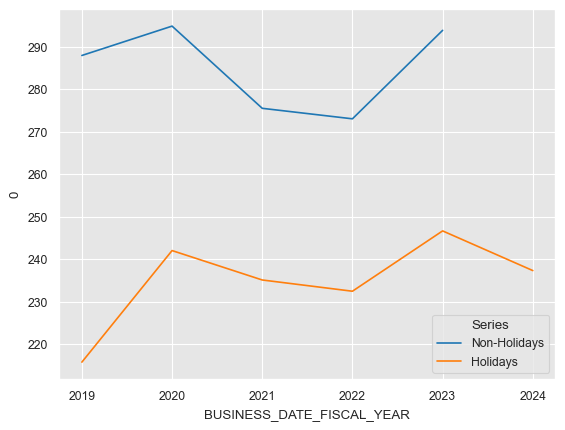

In [217]:
sns.lineplot(data = analysis_holidays.unstack()['TRANSACTION_FINAL_COUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 0,
             label='Non-Holidays')
sns.lineplot(data = analysis_holidays.unstack()['TRANSACTION_FINAL_COUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 1,
            label= 'Holidays')
plt.legend(title='Series')
plt.plot()

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

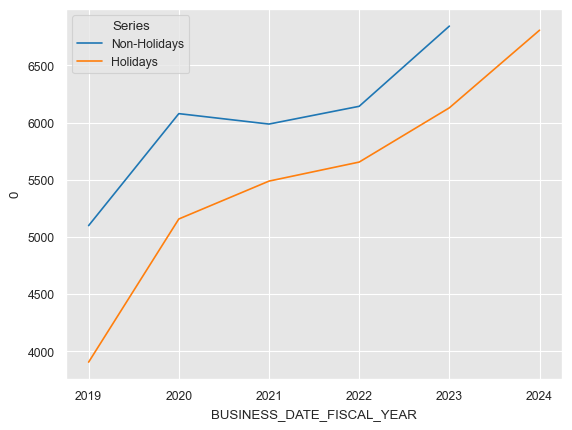

In [218]:
sns.lineplot(data = analysis_holidays.unstack()['NET_SALES_FINAL_USD_AMOUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 0,
             label='Non-Holidays')
sns.lineplot(data = analysis_holidays.unstack()['NET_SALES_FINAL_USD_AMOUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 1,
            label= 'Holidays')
plt.legend(title='Series')
plt.plot()

In [237]:
values = data.groupby('STORE_NUMBER')['NET_SALES_FINAL_USD_AMOUNT'].nsmallest(15).values
filtered_values = values[values != 0]
filtered_values

array([3987, 4000, 4091, 4209, 4234, 1396, 2219, 2345, 2347, 2312, 3045,
       3051, 3073, 3093, 1862, 2683, 2992, 3024, 3031, 3060, 3117, 4369,
       4971, 5080, 5115, 5284, 5288, 5535, 5601, 5623, 5721, 5728, 5764,
       5775, 1313, 2666, 2781, 2814, 2822, 2911, 2968, 3003, 3018, 3040,
       3048, 3060, 3098, 1734, 2013, 2086, 2251, 2306, 2539, 2599, 2602,
       2605, 2618, 2627, 2643, 2656], dtype=int16)

In [238]:
lowest_sales_for_every_store = data[data['NET_SALES_FINAL_USD_AMOUNT'] != 0].groupby(['BUSINESS_DATE_FISCAL_YEAR', 'STORE_NUMBER'])['NET_SALES_FINAL_USD_AMOUNT'].nsmallest(10).values
lowest_sales_for_every_store

array([ 1835,  1946,  2034,  2175,  2186,  2269,  2449,  2623,  2754,
        2756,  1838,  1917,  2099,  2106,  2531,  2718,  3026,  3073,
        3173,  3173,  5036,  5257,  5299,  5345,  5462,  5509,  5543,
        5544,  5597,  5648,  2219,  2345,  2347,  2391,  2495,  2535,
        2572,  2588,  2599,  2613,  3051,  3093,  3095,  3197,  3329,
        3330,  3451,  3472,  3485,  3515,  1426,  1941,  2222,  2540,
        2615,  2824,  2914,  2923,  2962,  3036,   942,  1315,  2204,
        2226,  2470,  2564,  2584,  2750,  3061,  3196,  4091,  4209,
        4234,  4294,  4354,  4575,  4670,  4694,  4700,  4728,  1396,
        2499,  2508,  2558,  2694,  2701,  2740,  2775,  2789,  2810,
        3619,  3638,  3646,  3844,  3893,  3910,  3945,  3955,  4001,
        4002,  3117,  3561,  3651,  3686,  4056,  4060,  4101,  4113,
        4136,  4154,   740,  1353,  1438,  1493,  1778,  2552,  2794,
        3028,  3096,  3099,  1144,  1281,  1385,  1514,  2088,  2679,
        2833,  3004,

In [239]:
lowest_sales = data[data['NET_SALES_FINAL_USD_AMOUNT'].isin(lowest_sales_for_every_store)][['BUSINESS_DATE','TRANSACTION_FINAL_COUNT',
                                                                                         'NET_SALES_FINAL_USD_AMOUNT','PY_TRANSACTION_FINAL_COUNT',
                                                                                         'PY_NET_SALES_FINAL_USD_AMOUNT']]
lowest_sales                                                                                         

,BUSINESS_DATE,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT
126957,2019-04-23,182,2754,0,0
126960,2019-04-26,242,4354,0,0
126984,2019-05-20,175,2756,0,0
126989,2019-05-25,200,4182,0,0
126990,2019-05-26,145,3024,0,0
...,...,...,...,...,...
560556,2023-12-13,183,4136,0,0
560559,2023-12-16,150,3955,0,0
560561,2023-12-18,166,3657,0,0
560566,2023-12-23,129,3051,0,0


In [240]:
lowest_sales_promos = data[data['NET_SALES_FINAL_USD_AMOUNT'].isin(lowest_sales_for_every_store)][['BUSINESS_DATE','PROMOTION_TYPE','PROMOTION_OFFER',
                                                                                         'PROMOTION_ITEM','PROMOTION_CASH_AMOUNT','PROMOTION_PERCENTAGE',
                                                                                         'PLATFORM','FREQUENCY']]
lowest_sales_promos

,BUSINESS_DATE,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY
126957,2019-04-23,No Promotion,No Offers,No Items,0,0.0,No Platform,None
126960,2019-04-26,No Promotion,No Offers,No Items,0,0.0,No Platform,None
126984,2019-05-20,No Promotion,No Offers,No Items,0,0.0,No Platform,None
126989,2019-05-25,No Promotion,No Offers,No Items,0,0.0,No Platform,None
126990,2019-05-26,No Promotion,No Offers,No Items,0,0.0,No Platform,None
...,...,...,...,...,...,...,...,...
560556,2023-12-13,Free Item,Protein,Sandwich,0,0.0,DD,Daily
560559,2023-12-16,Free Item,Protein,Sandwich,0,0.0,DD,Daily
560561,2023-12-18,No Promotion,No Offers,No Items,0,0.0,No Platform,None
560566,2023-12-23,No Promotion,No Offers,No Items,0,0.0,No Platform,None


In [241]:
lowest_sales_promos['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        525
Free Item            68
Overall Discount     28
Delivery Fee         14
Name: count, dtype: int64

In [242]:
lowest_dates = data[data['NET_SALES_FINAL_USD_AMOUNT'].isin(lowest_sales_for_every_store)][['BUSINESS_DATE','MONTH_NAME','DAY_NAME',
                                                                                                       'BUSINESS_DATE_FISCAL_YEAR']]
lowest_dates

,BUSINESS_DATE,MONTH_NAME,DAY_NAME,BUSINESS_DATE_FISCAL_YEAR
126957,2019-04-23,April,Tuesday,2019
126960,2019-04-26,April,Friday,2019
126984,2019-05-20,May,Monday,2019
126989,2019-05-25,May,Saturday,2019
126990,2019-05-26,May,Sunday,2019
...,...,...,...,...
560556,2023-12-13,December,Wednesday,2023
560559,2023-12-16,December,Saturday,2023
560561,2023-12-18,December,Monday,2023
560566,2023-12-23,December,Saturday,2023


In [243]:
lowest_dates.groupby('BUSINESS_DATE_FISCAL_YEAR')['MONTH_NAME'].value_counts()

BUSINESS_DATE_FISCAL_YEAR  MONTH_NAME
2019                       August        26
                           May           16
                           December      14
                           October       14
                           June          12
                                         ..
2024                       August         0
                           January        0
                           February       0
                           April          0
                           September      0
Name: count, Length: 72, dtype: int64

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

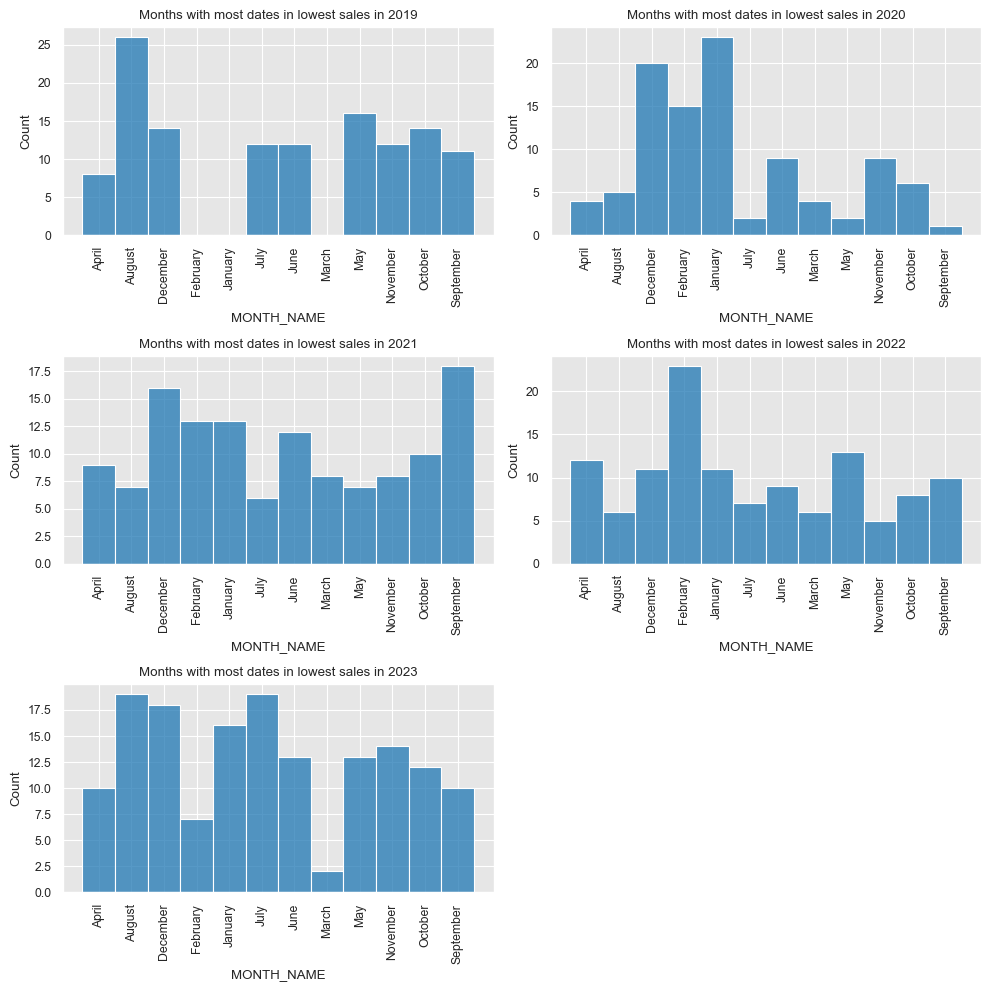

In [245]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, ncols=2)

# Plot data
years = range(2019, 2024)
for i, year in enumerate(years):
    row = i // 2  # Determine row index
    col = i % 2   # Determine column index
    
    sns.histplot(data=lowest_dates[lowest_dates['BUSINESS_DATE_FISCAL_YEAR'] == year],
                x='MONTH_NAME',
                ax=axes[row, col])
    axes[row, col].set_title(f'Months with most dates in lowest sales in {year}')

# Remove unused subplots if any
for j in range(len(years), 6):
    fig.delaxes(axes[j // 2, j % 2])

# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [249]:
monthly_sales = data.groupby(['BUSINESS_DATE_FISCAL_YEAR', 'MONTH_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()

# Fill NaNs in the numeric column only
monthly_sales['NET_SALES_FINAL_USD_AMOUNT'] = monthly_sales['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

print(monthly_sales)

    BUSINESS_DATE_FISCAL_YEAR MONTH_NAME  NET_SALES_FINAL_USD_AMOUNT
0                        2019      April                 4468.850000
1                        2019     August                 4925.348387
2                        2019   December                 5198.378571
3                        2019   February                    0.000000
4                        2019    January                    0.000000
..                        ...        ...                         ...
67                       2024      March                    0.000000
68                       2024        May                    0.000000
69                       2024   November                    0.000000
70                       2024    October                    0.000000
71                       2024  September                    0.000000

[72 rows x 3 columns]


C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\390412294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = data.groupby(['BUSINESS_DATE_FISCAL_YEAR', 'MONTH_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()


In [251]:
import pandas as pd

# Initialize an empty DataFrame to collect results
results = pd.DataFrame()

# Iterate over each unique fiscal year
for year in monthly_sales['BUSINESS_DATE_FISCAL_YEAR'].unique():
    # Filter data for the current year
    year_data = monthly_sales[monthly_sales['BUSINESS_DATE_FISCAL_YEAR'] == year]
    
    # Filter out rows with zero sales
    filtered_data = year_data[year_data['NET_SALES_FINAL_USD_AMOUNT'] > 0]
    
    # Get top 3 months with the highest sales
    top_months = year_data.nlargest(3, 'NET_SALES_FINAL_USD_AMOUNT')
    
    # Get bottom 3 months with the lowest non-zero sales
    bottom_months = filtered_data.nsmallest(3, 'NET_SALES_FINAL_USD_AMOUNT')
    
    # Assign positions
    top_months['Position'] = 'Top 3'
    bottom_months['Position'] = 'Bottom 3'
    
    # Concatenate results
    results = pd.concat([results, top_months, bottom_months])

# Reset index for the final DataFrame
results.reset_index(drop=True, inplace=True)

print(results)

    BUSINESS_DATE_FISCAL_YEAR MONTH_NAME  NET_SALES_FINAL_USD_AMOUNT  Position
0                        2019   December                 5198.378571     Top 3
1                        2019    October                 5133.322581     Top 3
2                        2019   November                 5120.020000     Top 3
3                        2019      April                 4468.850000  Bottom 3
4                        2019     August                 4925.348387  Bottom 3
5                        2019        May                 4937.387097  Bottom 3
6                        2020        May                 6593.832258     Top 3
7                        2020  September                 6588.086667     Top 3
8                        2020       July                 6527.619355     Top 3
9                        2020    January                 4855.148387  Bottom 3
10                       2020   February                 5428.372414  Bottom 3
11                       2020   December            

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


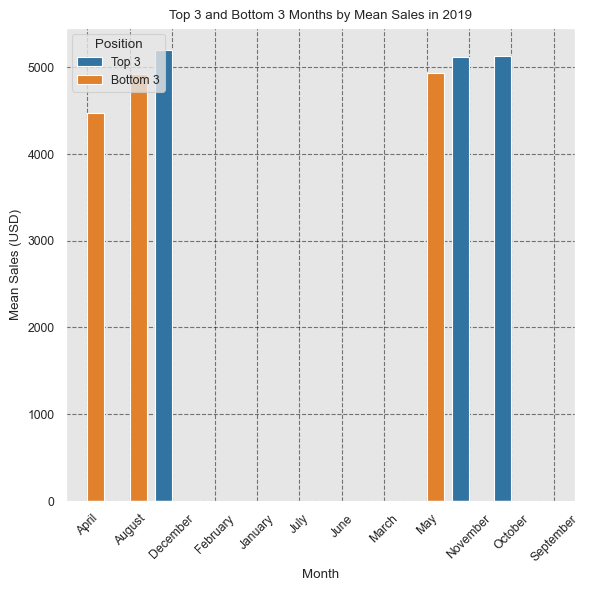

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


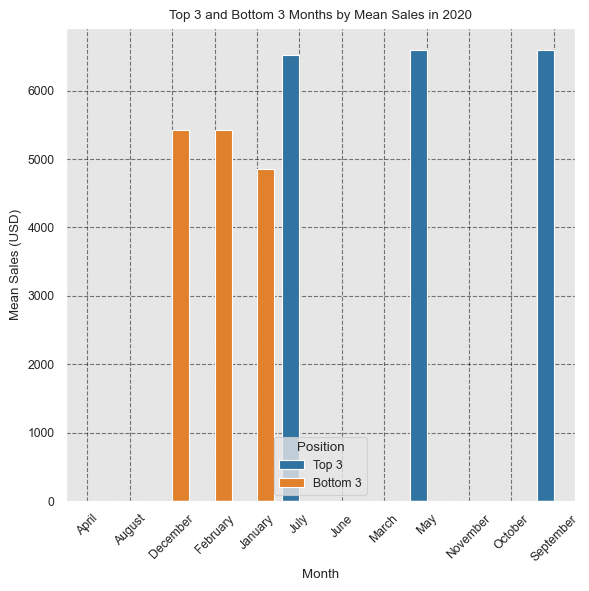

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


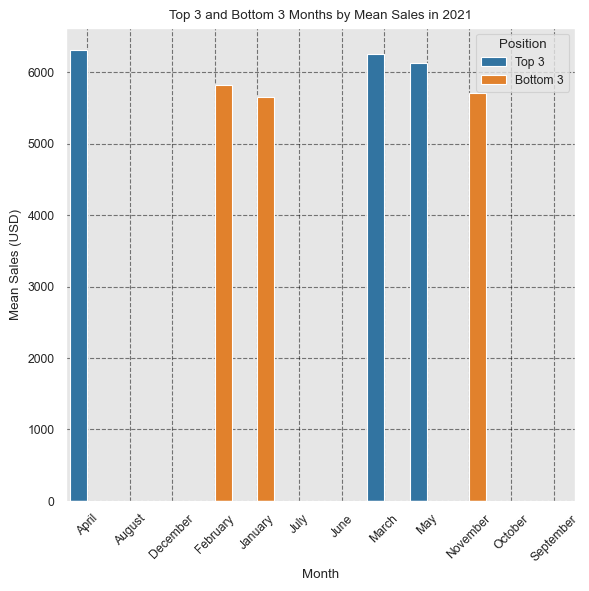

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


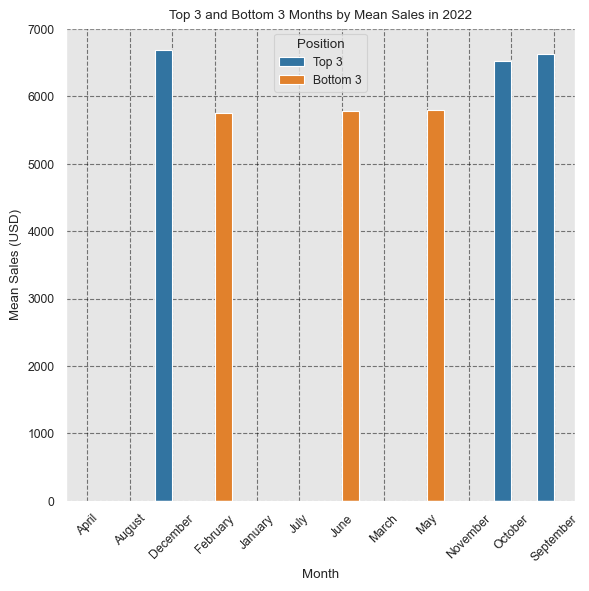

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


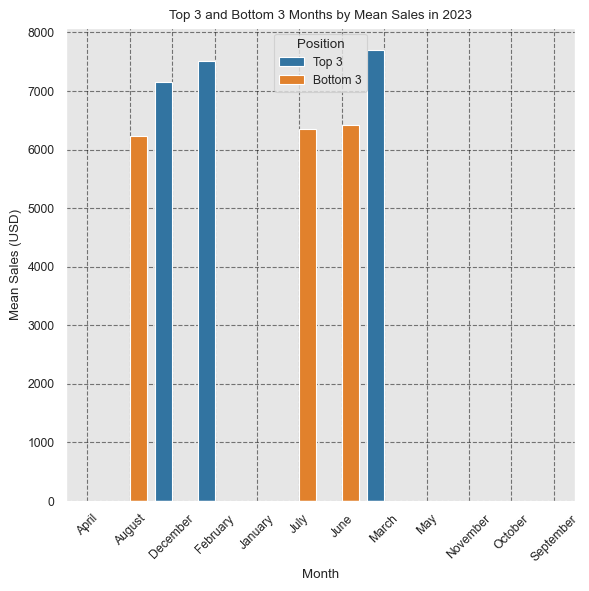

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


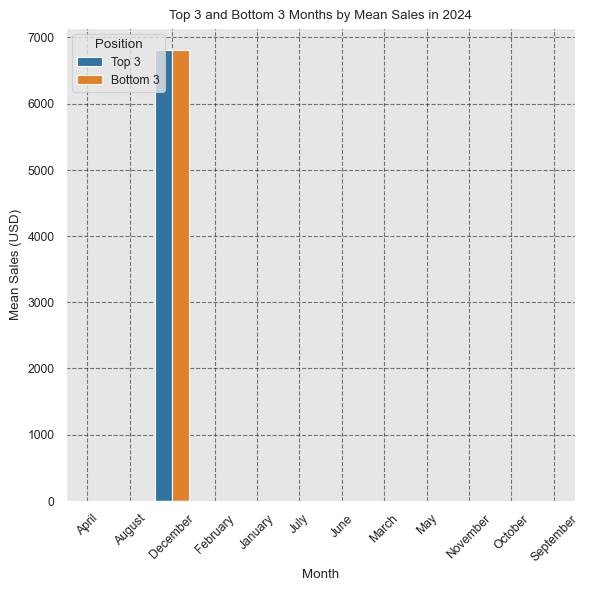

In [252]:
years = monthly_sales['BUSINESS_DATE_FISCAL_YEAR'].unique()
for year in years:
    plt.figure(figsize=(6, 6))
    year_data = results[results['BUSINESS_DATE_FISCAL_YEAR'] == year]
    
    ax = sns.barplot(data=year_data, x='MONTH_NAME', y='NET_SALES_FINAL_USD_AMOUNT', hue='Position')
    
    plt.title(f'Top 3 and Bottom 3 Months by Mean Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Mean Sales (USD)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability    
    # Enable grid lines
    ax.grid(True, linestyle='--', alpha=0.5, color = 'black')
    
    plt.tight_layout()
    plt.show()

In [253]:
all_holidays_and_events

DatetimeIndex(['2019-01-01', '2019-01-21', '2019-02-03', '2019-02-14',
               '2019-02-18', '2019-03-17', '2019-04-21', '2019-05-12',
               '2019-05-27', '2019-06-16',
               ...
               '2023-10-09', '2023-10-31', '2023-11-11', '2023-11-23',
               '2023-11-24', '2023-11-25', '2023-11-27', '2023-12-24',
               '2023-12-25', '2023-12-31'],
              dtype='datetime64[ns]', length=110, freq=None)

In [269]:
def mean(business_date):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=3)
    end_date = business_date + pd.DateOffset(days=3)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons
    mean_sales = data[
        (data['BUSINESS_DATE'] >= start_date) &
        (data['BUSINESS_DATE'] <= end_date)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales * 7/6

In [270]:
def mean_2weekly(business_date):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=7)
    end_date = business_date + pd.DateOffset(days=6)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons
    mean_sales = data[
        (data['BUSINESS_DATE'] >= start_date) &
        (data['BUSINESS_DATE'] <= end_date)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales * 14/13

In [273]:
def mean_not_holidays(business_date):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=3)
    end_date = business_date + pd.DateOffset(days=3)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    data['BUSINESS_DATE'] = pd.to_datetime(df['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons and excluding the date range around the holiday
    mean_sales = data[
        (~((data['BUSINESS_DATE'] >= start_date) & (data['BUSINESS_DATE'] <= end_date))) &
        (data['BUSINESS_DATE'].dt.year == business_date.year) &
        (data['BUSINESS_DATE'].dt.month == business_date.month)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales 

In [274]:
business_dates = []
mean_7_days = []
mean_rest_of_month = []
mean_14_days = []
# Loop through each holiday/event date and calculate the means
for date in all_holidays_and_events:
    mean_14_days.append(mean_2weekly(date))
    business_dates.append(date)
    mean_7_days.append(mean(date))
    mean_rest_of_month.append(mean_not_holidays(date))

# Create a DataFrame from the lists
results_df = pd.DataFrame({
    'BUSINESS_DATE': business_dates,
    'MEAN_SALES_7_DAYS': mean_7_days,
    'MEAN_SALES_14_DATS': mean_14_days,
    'MEAN_SALES_REST_OF_MONTH': mean_rest_of_month
})

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1666088928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3940626616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])


KeyError: 'BUSINESS_DATE'

In [279]:
import pandas as pd

def mean(business_date, df):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=3)
    end_date = business_date + pd.DateOffset(days=3)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    df.loc[:, 'BUSINESS_DATE'] = pd.to_datetime(df['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons
    mean_sales = df[
        (df['BUSINESS_DATE'] >= start_date) &
        (df['BUSINESS_DATE'] <= end_date)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales * 7/6

def mean_2weekly(business_date, df):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=7)
    end_date = business_date + pd.DateOffset(days=6)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    df.loc[:, 'BUSINESS_DATE'] = pd.to_datetime(df['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons
    mean_sales = df[
        (df['BUSINESS_DATE'] >= start_date) &
        (df['BUSINESS_DATE'] <= end_date)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales * 14/13

def mean_not_holidays(business_date, df):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=3)
    end_date = business_date + pd.DateOffset(days=3)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    df.loc[:, 'BUSINESS_DATE'] = pd.to_datetime(df['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons and excluding the date range around the holiday
    mean_sales = df[
        (~((df['BUSINESS_DATE'] >= start_date) & (df['BUSINESS_DATE'] <= end_date))) &
        (df['BUSINESS_DATE'].dt.year == business_date.year) &
        (df['BUSINESS_DATE'].dt.month == business_date.month)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales

# Assuming 'data' is your DataFrame and 'all_holidays_and_events' is a list of dates
business_dates = []
mean_7_days = []
mean_rest_of_month = []
mean_14_days = []

for date in all_holidays_and_events:
    mean_14_days.append(mean_2weekly(date, data))
    business_dates.append(date)
    mean_7_days.append(mean(date, data))
    mean_rest_of_month.append(mean_not_holidays(date, data))

# Create a DataFrame from the lists
results_df = pd.DataFrame({
    'BUSINESS_DATE': business_dates,
    'MEAN_SALES_7_DAYS': mean_7_days,
    'MEAN_SALES_14_DAYS': mean_14_days,
    'MEAN_SALES_REST_OF_MONTH': mean_rest_of_month
})

results_df


,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH
0,2019-01-01,NaN,NaN,NaN
1,2019-01-21,NaN,NaN,NaN
2,2019-02-03,NaN,NaN,NaN
3,2019-02-14,NaN,NaN,NaN
4,2019-02-18,NaN,NaN,NaN
...,...,...,...,...
105,2023-11-25,6558.944444,6959.017094,7110.816425
106,2023-11-27,7405.425926,7040.059829,6889.995169
107,2023-12-24,6715.925926,7020.188034,7547.300926
108,2023-12-25,6662.814815,6882.726496,7560.578704


In [280]:
results_df.dropna(inplace = True)

In [281]:
results_df

,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH
6,2019-04-21,4449.783333,4879.667692,4687.100000
7,2019-05-12,5764.600000,5433.753846,4936.308333
8,2019-05-27,5427.166667,5077.584615,5020.666667
9,2019-06-16,5556.700000,5332.800000,5141.860870
10,2019-07-04,5995.066667,5415.738462,4930.175000
...,...,...,...,...
105,2023-11-25,6558.944444,6959.017094,7110.816425
106,2023-11-27,7405.425926,7040.059829,6889.995169
107,2023-12-24,6715.925926,7020.188034,7547.300926
108,2023-12-25,6662.814815,6882.726496,7560.578704


In [282]:
results_df['PCT_CHANGE'] =  ( results_df['MEAN_SALES_7_DAYS'] - results_df['MEAN_SALES_REST_OF_MONTH'] ) / results_df['MEAN_SALES_7_DAYS'] * 100

In [283]:
results_df

,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH,PCT_CHANGE
6,2019-04-21,4449.783333,4879.667692,4687.100000,-5.333218
7,2019-05-12,5764.600000,5433.753846,4936.308333,14.368589
8,2019-05-27,5427.166667,5077.584615,5020.666667,7.490096
9,2019-06-16,5556.700000,5332.800000,5141.860870,7.465566
10,2019-07-04,5995.066667,5415.738462,4930.175000,17.762799
...,...,...,...,...,...
105,2023-11-25,6558.944444,6959.017094,7110.816425,-8.414037
106,2023-11-27,7405.425926,7040.059829,6889.995169,6.960177
107,2023-12-24,6715.925926,7020.188034,7547.300926,-12.379157
108,2023-12-25,6662.814815,6882.726496,7560.578704,-13.474243


In [284]:
results_df['PCT_CHANGE_14_DAYS'] =  ( results_df['MEAN_SALES_14_DAYS'] - results_df['MEAN_SALES_REST_OF_MONTH'] ) / results_df['MEAN_SALES_14_DAYS'] * 100

In [285]:
results_df

,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH,PCT_CHANGE,PCT_CHANGE_14_DAYS
6,2019-04-21,4449.783333,4879.667692,4687.100000,-5.333218,3.946328
7,2019-05-12,5764.600000,5433.753846,4936.308333,14.368589,9.154730
8,2019-05-27,5427.166667,5077.584615,5020.666667,7.490096,1.120965
9,2019-06-16,5556.700000,5332.800000,5141.860870,7.465566,3.580467
10,2019-07-04,5995.066667,5415.738462,4930.175000,17.762799,8.965785
...,...,...,...,...,...,...
105,2023-11-25,6558.944444,6959.017094,7110.816425,-8.414037,-2.181333
106,2023-11-27,7405.425926,7040.059829,6889.995169,6.960177,2.131582
107,2023-12-24,6715.925926,7020.188034,7547.300926,-12.379157,-7.508530
108,2023-12-25,6662.814815,6882.726496,7560.578704,-13.474243,-9.848600


In [286]:
results_df[results_df['PCT_CHANGE'] > 0]

,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH,PCT_CHANGE,PCT_CHANGE_14_DAYS
7,2019-05-12,5764.600000,5433.753846,4936.308333,14.368589,9.154730
8,2019-05-27,5427.166667,5077.584615,5020.666667,7.490096,1.120965
9,2019-06-16,5556.700000,5332.800000,5141.860870,7.465566,3.580467
10,2019-07-04,5995.066667,5415.738462,4930.175000,17.762799,8.965785
11,2019-09-02,5796.233333,5300.600000,5172.648000,10.758458,2.413915
...,...,...,...,...,...,...
100,2023-10-09,8192.685185,7503.162393,6797.717593,17.026989,9.401966
101,2023-10-31,8358.481481,7516.068376,6809.123457,18.536358,9.405781
102,2023-11-11,8410.722222,7675.538462,6627.743961,21.198872,13.651088
106,2023-11-27,7405.425926,7040.059829,6889.995169,6.960177,2.131582


In [287]:
results_df[results_df['PCT_CHANGE'] < 0]

,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH,PCT_CHANGE,PCT_CHANGE_14_DAYS
6,2019-04-21,4449.783333,4879.667692,4687.100000,-5.333218,3.946328
15,2019-11-28,4960.600000,5144.415385,5408.416667,-9.027470,-5.131803
16,2019-11-29,4964.466667,5215.015385,5377.928000,-8.328414,-3.123914
17,2019-11-30,4988.566667,5265.261538,5355.107692,-7.347622,-1.706395
19,2019-12-24,5236.800000,5214.846154,5433.983333,-3.765340,-4.202179
20,2019-12-25,5226.266667,5272.769231,5436.616667,-4.024862,-3.107427
37,2020-11-26,5707.277778,5663.992586,6000.193277,-5.132315,-5.935754
38,2020-11-27,5689.277778,5666.641026,6005.638655,-5.560651,-5.982338
39,2020-11-28,5709.027778,5687.653846,5955.384000,-4.315204,-4.707216
41,2020-12-24,5453.888889,5711.974359,5719.701389,-4.873816,-0.135278


In [288]:
results_df[results_df['PCT_CHANGE_14_DAYS'] > 0]

,BUSINESS_DATE,MEAN_SALES_7_DAYS,MEAN_SALES_14_DAYS,MEAN_SALES_REST_OF_MONTH,PCT_CHANGE,PCT_CHANGE_14_DAYS
6,2019-04-21,4449.783333,4879.667692,4687.100000,-5.333218,3.946328
7,2019-05-12,5764.600000,5433.753846,4936.308333,14.368589,9.154730
8,2019-05-27,5427.166667,5077.584615,5020.666667,7.490096,1.120965
9,2019-06-16,5556.700000,5332.800000,5141.860870,7.465566,3.580467
10,2019-07-04,5995.066667,5415.738462,4930.175000,17.762799,8.965785
...,...,...,...,...,...,...
99,2023-09-04,8261.537037,7544.162393,7009.289855,15.157557,7.089886
100,2023-10-09,8192.685185,7503.162393,6797.717593,17.026989,9.401966
101,2023-10-31,8358.481481,7516.068376,6809.123457,18.536358,9.405781
102,2023-11-11,8410.722222,7675.538462,6627.743961,21.198872,13.651088


In [289]:
results_df[results_df['PCT_CHANGE_14_DAYS'] > 0]['PCT_CHANGE_14_DAYS'].describe()

count    77.000000
mean      6.916602
std       4.371808
min       0.142239
25%       3.032594
50%       6.405592
75%       9.405781
max      21.992491
Name: PCT_CHANGE_14_DAYS, dtype: float64

In [290]:
results_df[results_df['PCT_CHANGE'] > 0]['PCT_CHANGE'].describe()

count    81.000000
mean     14.427669
std       6.267906
min       0.061212
25%       9.828817
50%      14.309966
75%      18.382458
max      29.566092
Name: PCT_CHANGE, dtype: float64

In [291]:
results_df['PCT_CHANGE'].describe()

count    104.000000
mean       9.614249
std       10.790278
min      -15.504832
25%        4.200364
50%       12.236921
75%       16.976836
max       29.566092
Name: PCT_CHANGE, dtype: float64

In [292]:
results_df['PCT_CHANGE_14_DAYS'].describe()

count    104.000000
mean       4.101676
std        6.250700
min       -9.848600
25%       -0.082674
50%        3.942690
75%        8.780119
max       21.992491
Name: PCT_CHANGE_14_DAYS, dtype: float64

In [294]:
spring_months = ['March' , 'April', 'May']
summer_months = ['June', 'July', 'August']
autum_months = ['September', 'October', 'November']
winter_months = ['December', 'January', 'February']

In [295]:
data[data['MONTH_NAME'].isin(spring_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

6226.217970049916

In [296]:
data[data['MONTH_NAME'].isin(summer_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

5964.8983899821105

In [297]:
data[data['MONTH_NAME'].isin(autum_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

6220.698446327684

In [298]:
data[data['MONTH_NAME'].isin(winter_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

6094.561172472388

In [302]:
data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR')

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\481806214.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR')


SEASON_NAME,Autumn,Spring,Summer,Winter
YEAR,,,,
2019,5113.041758,4841.276923,4984.602174,5220.529032
2020,6243.793991,6281.817391,6334.558696,5266.746914
2021,5903.677656,6231.699275,5914.510870,5800.381481
2022,6453.641026,5830.072464,6009.822464,6159.775926
2023,6878.974359,6939.604651,6333.132296,7139.480253


In [305]:
data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn']

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1190064153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn']


YEAR
2019    5113.041758
2020    6243.793991
2021    5903.677656
2022    6453.641026
2023    6878.974359
Name: Autumn, dtype: float64

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1004754483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'],
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1004754483.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'].values)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

<Axes: xlabel='YEAR'>

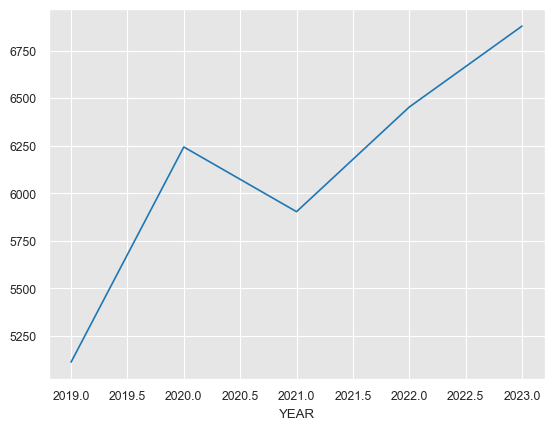

In [309]:
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'],
             x = 'YEAR',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'].values)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\2278482345.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Spring'],
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\2278482345.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Spring'].values)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

<Axes: xlabel='YEAR'>

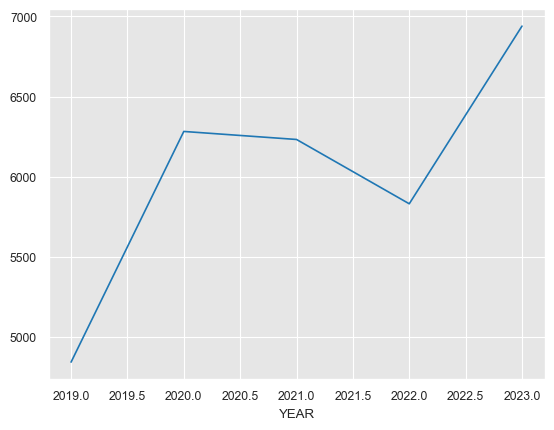

In [311]:
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Spring'],
             x = 'YEAR',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Spring'].values)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1004754483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'],
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1004754483.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'].values)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

<Axes: xlabel='YEAR'>

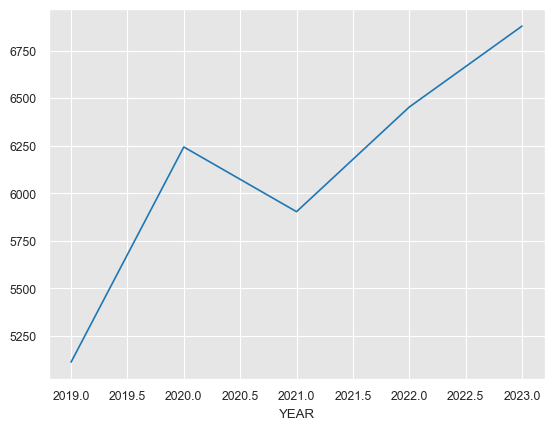

In [312]:
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'],
             x = 'YEAR',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'].values)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3446509967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Winter'],
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3446509967.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Winter'].values)
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert i

<Axes: xlabel='YEAR'>

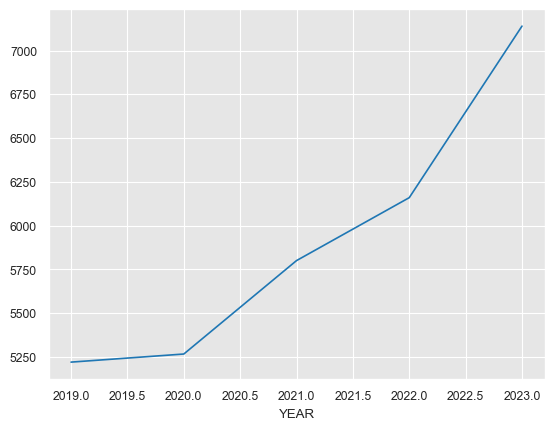

In [313]:
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Winter'],
             x = 'YEAR',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Winter'].values)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\699936143.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0],
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\699936143.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0].values,
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is dep

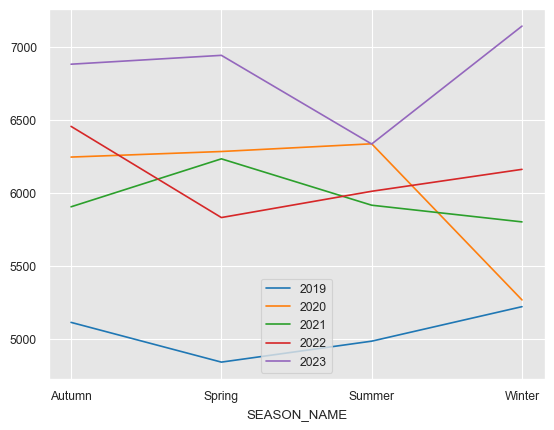

In [316]:
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0],
             x = 'SEASON_NAME',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0].values,
            label = '2019')
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[1],
             x = 'SEASON_NAME',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[1].values,
            label = '2020')
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[2],
             x = 'SEASON_NAME',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[2].values,
            label = '2021')
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[3],
             x = 'SEASON_NAME',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[3].values,
            label = '2022')
sns.lineplot(data = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[4],
             x = 'SEASON_NAME',
             y = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[4].values,
            label = '2023')
plt.legend()
plt.show()

In [321]:
result = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index()
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
result = result.reindex(columns=season_order).reset_index()
result

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1116623770.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(['YEAR','SEASON_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index()


SEASON_NAME,Spring,Summer,Autumn,Winter
0,4841.276923,4984.602174,5113.041758,5220.529032
1,6281.817391,6334.558696,6243.793991,5266.746914
2,6231.699275,5914.510870,5903.677656,5800.381481
3,5830.072464,6009.822464,6453.641026,6159.775926
4,6939.604651,6333.132296,6878.974359,7139.480253


In [324]:
data1 = data.copy()

In [325]:
data.set_index('BUSINESS_DATE',inplace = True)
               

In [326]:
quarterly_data = data['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index()
quarterly_data

,BUSINESS_DATE,NET_SALES_FINAL_USD_AMOUNT
0,2019-06-30,4933.518841
1,2019-09-30,4994.930435
2,2019-12-31,5158.369565
3,2020-03-31,5347.248352
4,2020-06-30,6374.050549
5,2020-09-30,6517.863043
6,2020-12-31,5859.306773
7,2021-03-31,5911.585185
8,2021-06-30,6113.930403
9,2021-09-30,5917.018116


In [331]:
quarterly_data['PCT_CHANGE'] = (quarterly_data['NET_SALES_FINAL_USD_AMOUNT'] - quarterly_data['NET_SALES_FINAL_USD_AMOUNT'].shift(1)) / quarterly_data['NET_SALES_FINAL_USD_AMOUNT'] * 100
quarterly_data.fillna(0)

,BUSINESS_DATE,NET_SALES_FINAL_USD_AMOUNT,PCT_CHANGE
0,2019-06-30,4933.518841,0.000000
1,2019-09-30,4994.930435,1.229478
2,2019-12-31,5158.369565,3.168426
3,2020-03-31,5347.248352,3.532261
4,2020-06-30,6374.050549,16.109100
5,2020-09-30,6517.863043,2.206436
6,2020-12-31,5859.306773,-11.239491
7,2021-03-31,5911.585185,0.884338
8,2021-06-30,6113.930403,3.309577
9,2021-09-30,5917.018116,-3.327897


C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

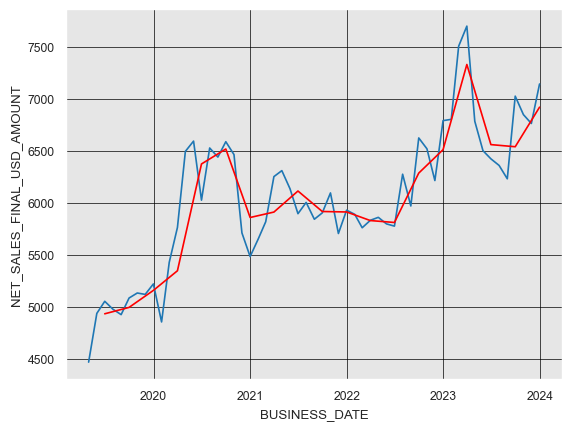

In [335]:
sns.lineplot(data = data['NET_SALES_FINAL_USD_AMOUNT'].resample('M').mean().reset_index(),
             x = 'BUSINESS_DATE',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
sns.lineplot(data = data['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index(),
             x = 'BUSINESS_DATE',
             y = 'NET_SALES_FINAL_USD_AMOUNT',
            color = 'red')
plt.grid(True, linestyle='-', linewidth=0.5, color = 'black')
plt.plot()

In [337]:
data1[data1['BUSINESS_DATE'].dt.date < data1['DOOR_DASH_MARKUP_GO_LIVE_DATE']]['NET_SALES_FINAL_USD_AMOUNT'].mean()

5575.785086042065

In [338]:
data1[data1['BUSINESS_DATE'].dt.date >= data1['DOOR_DASH_MARKUP_GO_LIVE_DATE']]['NET_SALES_FINAL_USD_AMOUNT'].mean()

6309.222136422137

[]

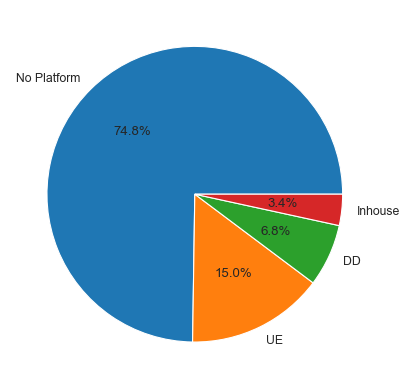

In [343]:
plt.pie(data1['PLATFORM'].value_counts(), labels=data1['PLATFORM'].value_counts().index, autopct='%1.1f%%')
plt.plot()

In [344]:
data1.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3221485707.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PLATFORM
DD             6847.071932
Inhouse        6164.615819
No Platform    5897.615920
UE             6917.455712
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [345]:
data1[data1['PLATFORM'] == 'DD']

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,BUSINESS_DATE,IS_A_HOLIDAY,MONTH_NAME,DAY_NAME,SEASON_NAME,YEAR,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_NAME,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_TRANSACTION_SALES,ROLLING_WINDOW_OF_7_DAYS,ROLLING_WINDOW_OF_14_DAYS,ROLLING_WINDOW_OF_30_DAYS,ROLLING_WINDOW_OF_60_DAYS,ROLLING_WINDOW_OF_90_DAYS,ROLLING_WINDOW_OF_180_DAYS,ROLLING_WINDOW_OF_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PY_PER_TRANSACTION_SALES,SALES_ROLLING_WINDOW_7_DAYS,PY_SALES_ROLLING_WINDOW_14_DAYS,PY_SALES_ROLLING_WINDOW_30_DAYS,PY_SALES_ROLLING_WINDOW_60_DAYS,PY_SALES_ROLLING_WINDOW_90_DAYS,PY_SALES_ROLLING_WINDOW_180_DAYS,PY_SALES_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_COVERAGE
127674,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2021-04-09,0,April,Friday,Spring,2021,LOS ANGELES,CA,CALIFORNIA,PACIFIC,803,LOS ANGELES,ACTIVE,4,WEST,0,2008-12-05,OPERATIONAL,Domestic,DOMESTICFRANCHISE,LOS ANGELES,2018-11-07,2018-11-07,2020-09-27,ORIGINAL,2022-07-20,0,0,104,2021,2020,1,273,6307,23.102564,4643,4816,5111,4994,4898,4726,4948,213,219,232,228,221,215,21.715326,21.979059,21.958950,21.881855,22.061962,21.811274,21.850504,225,260,6145,23.634615,5543,5220,5033,4886,4781,4559,4237,250,240,240,249,249,242,227,22.101717,21.641205,20.909378,19.563911,19.113533,18.478474,17.903193,Delivery Fee,Delivery,Delivery Fee,0,0.0,DD,Daily,National
128326,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2023-01-21,0,January,Saturday,Winter,2023,LOS ANGELES,CA,CALIFORNIA,PACIFIC,803,LOS ANGELES,ACTIVE,4,WEST,0,2008-12-05,OPERATIONAL,Domestic,DOMESTICFRANCHISE,LOS ANGELES,2018-11-07,2018-11-07,2020-09-27,ORIGINAL,2022-07-20,0,0,21,2023,2022,1,256,6138,23.976562,5686,6150,5470,5662,5518,5390,5270,246,258,233,244,241,236,23.019396,23.737736,23.420753,23.146933,22.813366,22.747381,23.169641,226,245,6349,25.914286,5081,5238,4902,5088,5089,4914,4974,208,215,199,207,214,213,222,24.259100,24.290085,23.697083,23.649771,23.165520,22.534744,22.084576,Overall Discount,Overall Discount,All Items,3,0.0,DD,Daily,National
128327,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2023-01-22,0,January,Sunday,Winter,2023,LOS ANGELES,C

In [346]:
data1[data1['PLATFORM'] == 'Inhouse']

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,BUSINESS_DATE,IS_A_HOLIDAY,MONTH_NAME,DAY_NAME,SEASON_NAME,YEAR,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_NAME,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_TRANSACTION_SALES,ROLLING_WINDOW_OF_7_DAYS,ROLLING_WINDOW_OF_14_DAYS,ROLLING_WINDOW_OF_30_DAYS,ROLLING_WINDOW_OF_60_DAYS,ROLLING_WINDOW_OF_90_DAYS,ROLLING_WINDOW_OF_180_DAYS,ROLLING_WINDOW_OF_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PY_PER_TRANSACTION_SALES,SALES_ROLLING_WINDOW_7_DAYS,PY_SALES_ROLLING_WINDOW_14_DAYS,PY_SALES_ROLLING_WINDOW_30_DAYS,PY_SALES_ROLLING_WINDOW_60_DAYS,PY_SALES_ROLLING_WINDOW_90_DAYS,PY_SALES_ROLLING_WINDOW_180_DAYS,PY_SALES_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_COVERAGE
127681,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2021-04-16,0,April,Friday,Spring,2021,LOS ANGELES,CA,CALIFORNIA,PACIFIC,803,LOS ANGELES,ACTIVE,4,WEST,0,2008-12-05,OPERATIONAL,Domestic,DOMESTICFRANCHISE,LOS ANGELES,2018-11-07,2018-11-07,2020-09-27,ORIGINAL,2022-07-20,0,0,111,2021,2020,1,248,5522,22.266129,5424,5033,5121,5003,4964,4739,4955,244,229,232,228,225,216,22.163572,21.956690,22.061935,21.844412,21.963989,21.843697,21.847488,226,254,5990,23.582678,5070,5307,5074,4936,4850,4595,4334,227,239,233,246,248,242,231,19.190573,20.646145,20.993935,19.703915,19.235994,18.543961,18.271231,Delivery Fee,Delivery,Delivery Fee,0,0.0,Inhouse,Daily,National
127682,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2021-04-17,0,April,Saturday,Spring,2021,LOS ANGELES,CA,CALIFORNIA,PACIFIC,803,LOS ANGELES,ACTIVE,4,WEST,0,2008-12-05,OPERATIONAL,Domestic,DOMESTICFRANCHISE,LOS ANGELES,2018-11-07,2018-11-07,2020-09-27,ORIGINAL,2022-07-20,0,0,112,2021,2020,1,240,5767,24.029167,5380,5061,5129,5032,4973,4744,4954,242,229,231,229,225,216,22.180674,22.014212,22.155430,21.910149,21.981474,21.862314,21.848721,226,261,6722,25.754789,5139,5370,5149,4983,4873,4616,4353,227,240,234,246,248,242,232,19.389917,20.797224,21.176823,19.857843,19.321436,18.598667,18.341791,Delivery Fee,Delivery,Delivery Fee,0,0.0,Inhouse,Daily,National
127683,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2021-04-18,0,April,Sunday,Spring,2021,LOS ANGELES,CA,

In [347]:
data1[data1['PLATFORM'] == 'UE']

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,BUSINESS_DATE,IS_A_HOLIDAY,MONTH_NAME,DAY_NAME,SEASON_NAME,YEAR,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_NAME,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_TRANSACTION_SALES,ROLLING_WINDOW_OF_7_DAYS,ROLLING_WINDOW_OF_14_DAYS,ROLLING_WINDOW_OF_30_DAYS,ROLLING_WINDOW_OF_60_DAYS,ROLLING_WINDOW_OF_90_DAYS,ROLLING_WINDOW_OF_180_DAYS,ROLLING_WINDOW_OF_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PY_PER_TRANSACTION_SALES,SALES_ROLLING_WINDOW_7_DAYS,PY_SALES_ROLLING_WINDOW_14_DAYS,PY_SALES_ROLLING_WINDOW_30_DAYS,PY_SALES_ROLLING_WINDOW_60_DAYS,PY_SALES_ROLLING_WINDOW_90_DAYS,PY_SALES_ROLLING_WINDOW_180_DAYS,PY_SALES_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_COVERAGE
128250,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2022-11-06,0,November,Sunday,Autumn,2022,LOS ANGELES,CA,CALIFORNIA,PACIFIC,803,LOS ANGELES,ACTIVE,4,WEST,0,2008-12-05,OPERATIONAL,Domestic,DOMESTICFRANCHISE,LOS ANGELES,2018-11-07,2018-11-07,2020-09-27,ORIGINAL,2022-07-20,0,0,316,2022,2021,1,252,5721,22.702381,4880,4896,5282,5212,5207,5098,5150,220,224,237,230,230,222,22.023169,21.754894,22.129942,22.546919,22.571251,22.859861,23.353710,220,236,5746,24.347458,5484,5233,4926,4799,4784,4863,4837,240,232,220,213,214,222,220,22.707205,22.380953,22.234482,22.032192,22.011055,21.757858,21.635286,Free Item,Protein,Chicken Sandwich,0,0.0,UE,Daily,National
128251,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2022-11-07,0,November,Monday,Autumn,2022,LOS ANGELES,CA,CALIFORNIA,PACIFIC,803,LOS ANGELES,ACTIVE,4,WEST,0,2008-12-05,OPERATIONAL,Domestic,DOMESTICFRANCHISE,LOS ANGELES,2018-11-07,2018-11-07,2020-09-27,ORIGINAL,2022-07-20,0,0,317,2022,2021,1,239,5273,22.062761,5273,4972,5246,5194,5213,5098,5149,237,225,236,229,230,222,22.165468,21.991520,22.111750,22.516394,22.575993,22.854969,23.347399,220,248,5457,22.004032,5668,5368,4928,4797,4788,4863,4836,245,238,221,213,214,221,220,23.058552,22.421257,22.096613,22.014421,22.031477,21.764498,21.636282,Free Item,Protein,Chicken Sandwich,0,0.0,UE,Daily,National
128252,1265,443,CA443,FRANCHISE,2008-12-05,1999-12-31,2022-11-08,0,November,Tuesday,Autumn,2022,LOS ANGELES,CA,CA

In [348]:
data1[(data1['PLATFORM'] == 'No Platform') & (data1['BUSINESS_DATE'] > pd.to_datetime('2021-04-09'))]['NET_SALES_FINAL_USD_AMOUNT'].mean()

6102.894775934637

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1912137315.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean(), labels=data1.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean().index, autopct='%1.1f%%')


[]

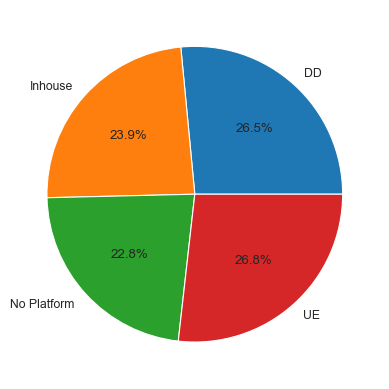

In [351]:
plt.pie(data1.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean(), labels=data1.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean().index, autopct='%1.1f%%')
plt.plot()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\4143696229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0),
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\4143696229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels=data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0).index, autopct='%1.1f%%')


[]

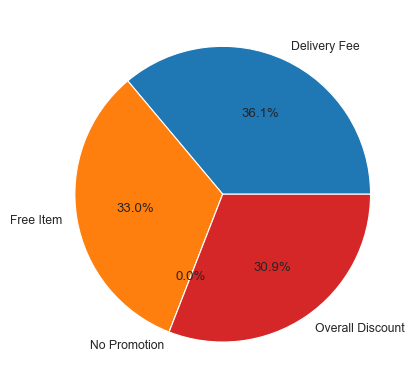

In [354]:
plt.pie(data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0),
        labels=data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0).index, autopct='%1.1f%%')
plt.plot()

In [356]:
data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1231621039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0)


PROMOTION_OFFER
Delivery            7800.000000
Dessert                0.000000
No Offers              0.000000
Overall Discount    6676.860310
Protein             7123.666667
Side                7134.349206
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3176547529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3176547529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels=data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')


[]

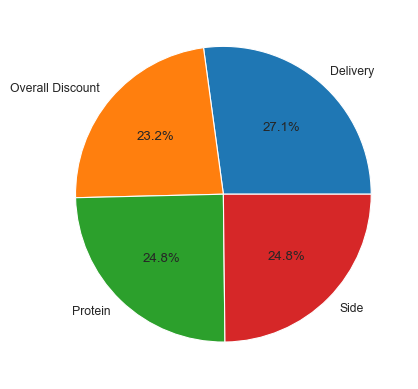

In [373]:
plt.pie(data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
        labels=data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')
plt.plot()

In [359]:
data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\2890705463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0)


PROMOTION_ITEM
All Items           6676.860310
Brownie                0.000000
Chicken Sandwich    6834.095238
Corn                   0.000000
Delivery Fee        7800.000000
Fries               7134.349206
No Items               0.000000
Sandwich            7413.238095
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1474549525.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1474549525.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels=data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')


[]

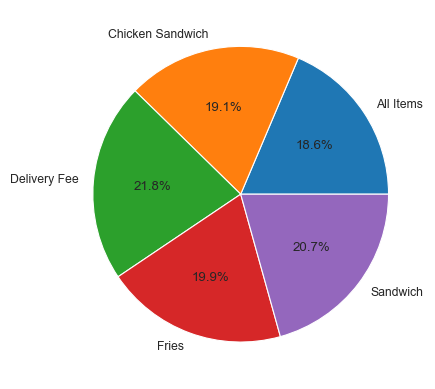

In [372]:
plt.pie(data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
        labels=data1[data1['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')
plt.plot()

In [363]:
data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0)

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\2222204090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().fillna(0)


PROMOTION_TYPE
Delivery Fee           0.000000
Free Item           6969.627095
No Promotion           0.000000
Overall Discount    6324.523810
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\163620523.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\163620523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels=data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')


[]

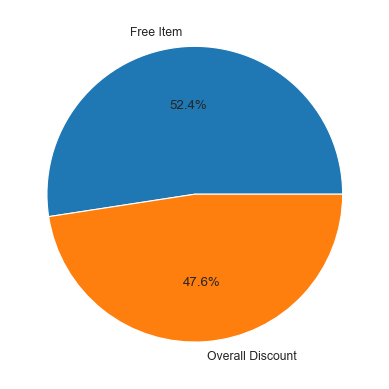

In [371]:
plt.pie(data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
        labels=data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')
plt.plot()

In [370]:
data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\4045354174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna()


PROMOTION_ITEM
All Items           6324.523810
Brownie             6897.274510
Chicken Sandwich    7398.067686
Corn                7057.281250
Fries               6765.816418
Sandwich            6703.619910
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1448036864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1448036864.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels=data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')


[]

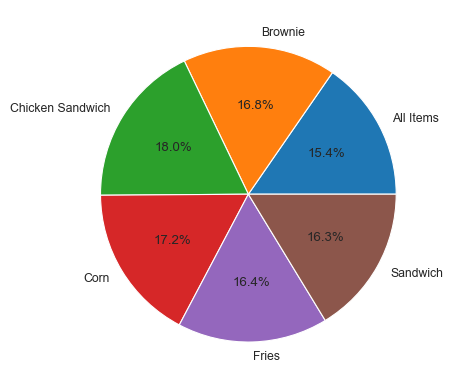

In [374]:
plt.pie(data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
        labels=data1[data1['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')
plt.plot()

In [376]:
data1[data1['PLATFORM'] == 'Inhouse'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\1892967865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1[data1['PLATFORM'] == 'Inhouse'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_TYPE
Delivery Fee        6164.615819
Free Item                   NaN
No Promotion                NaN
Overall Discount            NaN
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3322973249.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(data1[data1['PLATFORM'] == 'Inhouse'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\3322973249.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels=data1[data1['PLATFORM'] == 'Inhouse'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')


[]

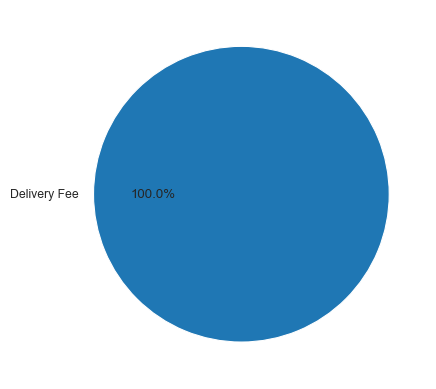

In [377]:
plt.pie(data1[data1['PLATFORM'] == 'Inhouse'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna(),
        labels=data1[data1['PLATFORM'] == 'Inhouse'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean().dropna().index, autopct='%1.1f%%')
plt.plot()

In [379]:
day_wise = data.groupby('DAY_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()
day_wise

C:\Users\yashd\AppData\Local\Temp\ipykernel_33308\256853212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_wise = data.groupby('DAY_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()


,DAY_NAME,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT
0,Friday,325.862046,7305.466353
1,Monday,260.902571,5260.312585
2,Saturday,304.213997,7108.291386
3,Sunday,302.306864,7073.978466
4,Thursday,262.764666,5559.832771
5,Tuesday,263.504383,5257.232637
6,Wednesday,254.447067,5297.443021


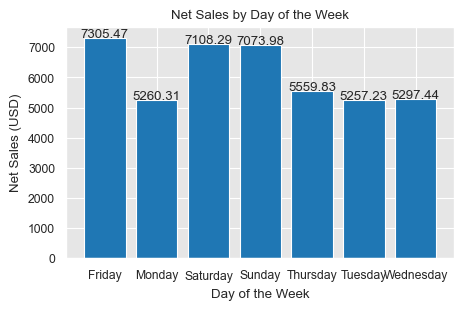

In [392]:
plt.figure(figsize=(5, 3))
plt.bar(day_wise['DAY_NAME'], day_wise['NET_SALES_FINAL_USD_AMOUNT'])

# Add labels
plt.xlabel('Day of the Week')
plt.ylabel('Net Sales (USD)')
plt.title('Net Sales by Day of the Week')

# Optionally, add value labels on top of the bars
for i, value in enumerate(day_wise['NET_SALES_FINAL_USD_AMOUNT']):
    plt.text(i, value + 10, f'{round(value,2)}', ha='center')

# Show the plot
plt.show()

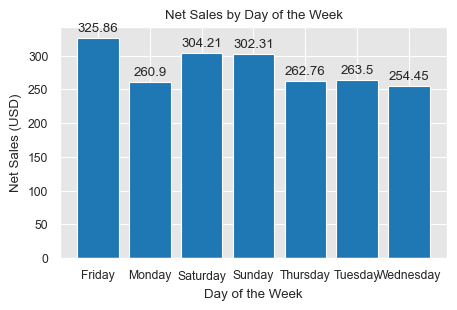

In [391]:
plt.figure(figsize=(5, 3))
plt.bar(day_wise['DAY_NAME'], day_wise['TRANSACTION_FINAL_COUNT'])

# Add labels
plt.xlabel('Day of the Week')
plt.ylabel('Net Sales (USD)')
plt.title('Net Sales by Day of the Week')

# Optionally, add value labels on top of the bars
for i, value in enumerate(day_wise['TRANSACTION_FINAL_COUNT']):
    plt.text(i, value + 10, f'{round(value,2)}', ha='center')

# Show the plot
plt.show()

In [393]:
day_wise['PER_PRODUCT'] = day_wise['NET_SALES_FINAL_USD_AMOUNT'] / day_wise['TRANSACTION_FINAL_COUNT']

In [394]:
day_wise.sort_values('NET_SALES_FINAL_USD_AMOUNT',ascending = False)

,DAY_NAME,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_PRODUCT
0,Friday,325.862046,7305.466353,22.418893
2,Saturday,304.213997,7108.291386,23.366089
3,Sunday,302.306864,7073.978466,23.399993
4,Thursday,262.764666,5559.832771,21.158982
6,Wednesday,254.447067,5297.443021,20.819430
1,Monday,260.902571,5260.312585,20.161981
5,Tuesday,263.504383,5257.232637,19.951215


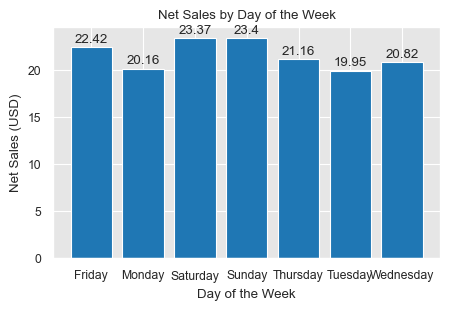

In [400]:
plt.figure(figsize=(5, 3))
plt.bar(day_wise['DAY_NAME'], day_wise['PER_PRODUCT'])

# Add labels
plt.xlabel('Day of the Week')
plt.ylabel('Net Sales (USD)')
plt.title('Net Sales by Day of the Week')

# Optionally, add value labels on top of the bars
for i, value in enumerate(day_wise['PER_PRODUCT']):
    plt.text(i, value + 0.5, f'{round(value,2)}', ha='center')

# Show the plot
plt.show()

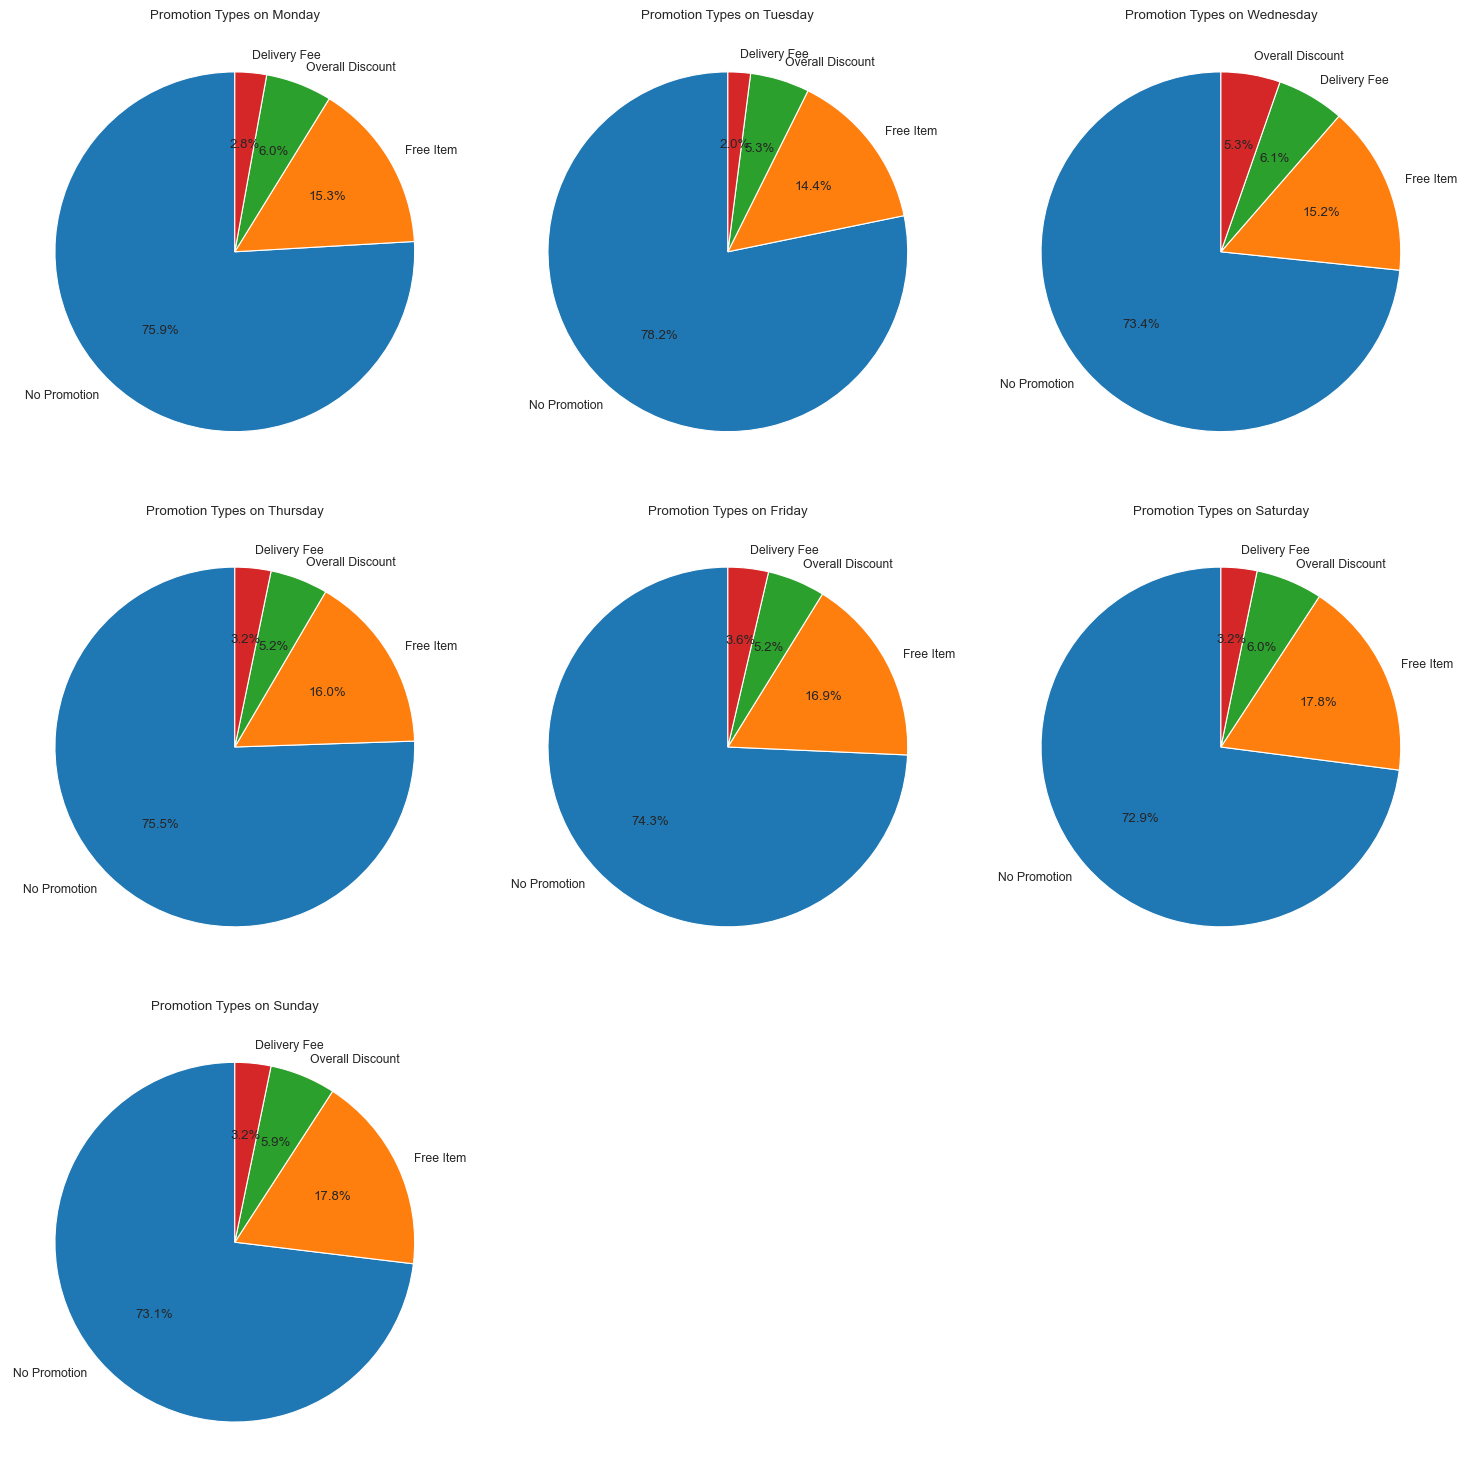

In [401]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, day in enumerate(days):
    ax = axes[i]
    promotion_counts = data[data['DAY_NAME'] == day]['PROMOTION_TYPE'].value_counts()
    ax.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Promotion Types on {day}')

# Hide the empty subplots (if any)
for j in range(len(days), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [402]:
pd.pivot_table(data = data,
               index = 'PROMOTION_TYPE',
               columns = 'DAY_NAME',
               values = 'TRANSACTION_FINAL_COUNT',
               aggfunc = 'mean')

DAY_NAME,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
PROMOTION_TYPE,,,,,,,
Delivery Fee,318.925926,255.714286,293.437500,297.083333,255.000000,266.066667,265.244444
Free Item,347.071713,265.017699,324.392453,321.746212,284.714286,264.612150,268.539823
No Promotion,321.301630,260.573975,299.130074,296.915285,259.140179,264.039655,250.592831
Overall Discount,326.974026,257.000000,311.865169,313.375000,252.480519,251.670886,254.911392


In [405]:
pd.pivot_table(data = data,
               index = 'PROMOTION_TYPE',
               columns = 'DAY_NAME',
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean')

DAY_NAME,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
PROMOTION_TYPE,,,,,,,
Delivery Fee,22.899656,20.425318,24.446632,24.061052,21.449373,20.170259,21.520851
Free Item,24.006281,21.700304,25.152456,24.939367,22.599865,21.183601,22.195644
No Promotion,21.968115,19.859459,22.858320,22.952257,20.755194,19.655533,20.374401
Overall Discount,23.860502,21.651144,24.867546,25.038126,22.813166,22.208027,22.452209


In [406]:
pd.pivot_table(data = data,
               index = 'PROMOTION_TYPE',
               columns = 'DAY_NAME',
               values = 'NET_SALES_FINAL_USD_AMOUNT',
               aggfunc = 'mean')

DAY_NAME,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
PROMOTION_TYPE,,,,,,,
Delivery Fee,7260.907407,5204.785714,7119.750000,7080.333333,5438.104167,5341.233333,5727.933333
Free Item,8367.227092,5766.261062,8183.649057,8024.386364,6437.222689,5628.789720,5973.194690
No Promotion,7029.926630,5136.462567,6790.456642,6781.780847,5364.682143,5165.074138,5091.122243
Overall Discount,7826.246753,5566.534091,7771.359551,7825.272727,5762.337662,5572.050633,5715.329114


In [411]:
pivot_table = pd.pivot_table(data = data,
               index = 'PROMOTION_OFFER',
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean')
pivot_table

,PER_TRANSACTION_SALES
PROMOTION_OFFER,
Delivery,22.206577
Dessert,23.260592
No Offers,21.180002
Overall Discount,23.300591
Protein,23.203508
Side,23.239117


In [412]:
values = pivot_table['PER_TRANSACTION_SALES']
labels = pivot_table.index

[]

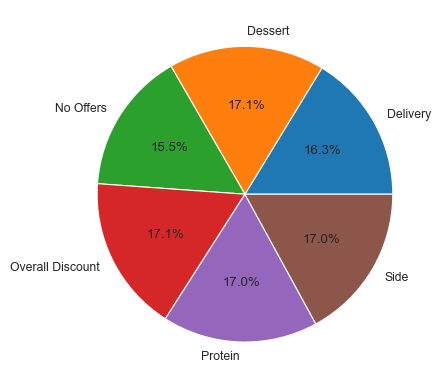

In [413]:
plt.pie(pd.pivot_table(data = data,
               index = 'PROMOTION_OFFER',
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean')['PER_TRANSACTION_SALES'],
        labels=pd.pivot_table(data = data,
               index = 'PROMOTION_OFFER',
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean').index, autopct='%1.1f%%')
plt.plot()

In [433]:
new = pd.DataFrame(data['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean())
new.fillna(0)

,NET_SALES_FINAL_USD_AMOUNT
BUSINESS_DATE,
2019-04-23,0.000000
2019-04-24,0.000000
2019-04-25,0.000000
2019-04-26,0.000000
2019-04-27,0.000000
...,...
2023-12-27,3858.166667
2023-12-28,3886.400000
2023-12-29,3891.466667


In [434]:
new['PROMOTION_TYPE'] = data['PROMOTION_TYPE']

In [437]:
new['NET_SALES_FINAL_USD_AMOUNT'] = new['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

In [439]:
new['PCT_CHANGE'] =  (new['NET_SALES_FINAL_USD_AMOUNT'] - new['NET_SALES_FINAL_USD_AMOUNT'].shift(1))/new['NET_SALES_FINAL_USD_AMOUNT'] * 100
new['PCT_CHANGE'] = new['PCT_CHANGE'].fillna(0)

In [475]:
new['SEASON'] = data['SEASON_NAME']

In [476]:
new

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE,SEASON
BUSINESS_DATE,,,,
2019-04-23,0.000000,No Promotion,0.000000,Spring
2019-04-24,0.000000,No Promotion,0.000000,Spring
2019-04-25,0.000000,No Promotion,0.000000,Spring
2019-04-26,0.000000,No Promotion,0.000000,Spring
2019-04-27,0.000000,No Promotion,0.000000,Spring
...,...,...,...,...
2023-12-27,3858.166667,No Promotion,0.120956,Winter
2023-12-28,3886.400000,No Promotion,0.726465,Winter
2023-12-29,3891.466667,No Promotion,0.130199,Winter


In [477]:
new[new['PCT_CHANGE'] < 0]

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE,SEASON
BUSINESS_DATE,,,,
2019-05-26,4099.100000,No Promotion,-1.081538,Spring
2019-05-27,4079.566667,No Promotion,-0.478809,Spring
2019-05-28,4053.066667,No Promotion,-0.653826,Spring
2019-05-29,4040.300000,No Promotion,-0.315983,Spring
2019-06-02,4064.266667,No Promotion,-0.378912,Summer
...,...,...,...,...
2023-12-21,3836.866667,No Promotion,-0.086008,Winter
2023-12-22,3827.733333,No Promotion,-0.238609,Winter
2023-12-25,3842.700000,No Promotion,-3.031722,Winter


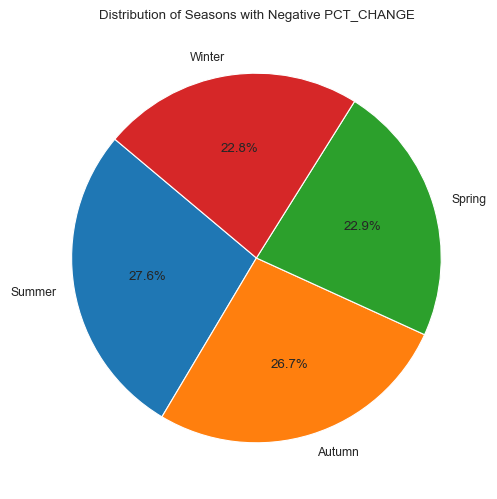

In [481]:
season_counts = new[new['PCT_CHANGE'] < 0]['SEASON'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seasons with Negative PCT_CHANGE')
plt.show()

In [442]:
new[new['PCT_CHANGE'] < 0]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        3840
Free Item            711
Overall Discount     298
Delivery Fee         160
Name: count, dtype: int64

In [443]:
(711+298+160) / 5009

0.23337991615092832

In [482]:
new[(new['PCT_CHANGE'] >= 0) & (new['NET_SALES_FINAL_USD_AMOUNT'] > 0)]

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE,SEASON
BUSINESS_DATE,,,,
2019-05-22,4057.066667,No Promotion,100.000000,Spring
2019-05-23,4070.133333,No Promotion,0.321038,Spring
2019-05-24,4128.300000,No Promotion,1.408974,Spring
2019-05-25,4143.433333,No Promotion,0.365237,Spring
2019-05-30,4044.633333,No Promotion,0.107138,Spring
...,...,...,...,...
2023-12-24,3959.200000,No Promotion,0.751835,Winter
2023-12-26,3853.500000,No Promotion,0.280265,Winter
2023-12-27,3858.166667,No Promotion,0.120956,Winter


In [483]:
new[(new['PCT_CHANGE'] >= 0) & (new['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['SEASON'].value_counts()

SEASON
Autumn    1493
Summer    1414
Spring    1228
Winter    1212
Name: count, dtype: int64

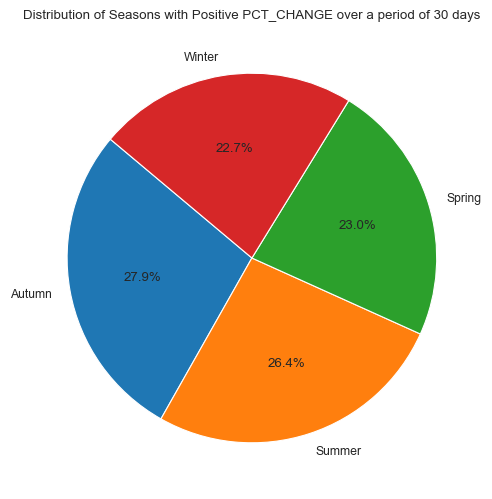

In [485]:
season_counts = new[(new['PCT_CHANGE'] >= 0) & (new['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['SEASON'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seasons with Positive PCT_CHANGE over a period of 30 days')
plt.show()

In [445]:
new[(new['PCT_CHANGE'] >= 0) & (new['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        3895
Free Item            973
Overall Discount     279
Delivery Fee         200
Name: count, dtype: int64

In [446]:
(973+279+200) / 5347

0.2715541425098186

In [447]:
0.2715541425098186 / 0.23337991615092832

1.1635711717978454

### 1.16 TIMES MORE OFFERS APPLIED WHEN THE SALES ARE ON THE UP.

In [448]:
new1 = pd.DataFrame(data['NET_SALES_FINAL_USD_AMOUNT'].rolling(7).mean())
new1.fillna(0)

,NET_SALES_FINAL_USD_AMOUNT
BUSINESS_DATE,
2019-04-23,0.000000
2019-04-24,0.000000
2019-04-25,0.000000
2019-04-26,0.000000
2019-04-27,0.000000
...,...
2023-12-27,2857.285714
2023-12-28,2890.000000
2023-12-29,2925.000000


In [450]:
new1['PROMOTION_TYPE'] = data['PROMOTION_TYPE']

In [452]:
new1['NET_SALES_FINAL_USD_AMOUNT'] = new1['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

In [454]:
new1['PCT_CHANGE'] =  (new1['NET_SALES_FINAL_USD_AMOUNT'] - new1['NET_SALES_FINAL_USD_AMOUNT'].shift(1))/new1['NET_SALES_FINAL_USD_AMOUNT'] * 100
new1['PCT_CHANGE'] = new1['PCT_CHANGE'].fillna(0)
new1

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE
BUSINESS_DATE,,,
2019-04-23,0.000000,No Promotion,0.000000
2019-04-24,0.000000,No Promotion,0.000000
2019-04-25,0.000000,No Promotion,0.000000
2019-04-26,0.000000,No Promotion,0.000000
2019-04-27,0.000000,No Promotion,0.000000
...,...,...,...
2023-12-27,2857.285714,No Promotion,-0.554972
2023-12-28,2890.000000,No Promotion,1.131982
2023-12-29,2925.000000,No Promotion,1.196581


In [455]:
new1[new1['PCT_CHANGE'] < 0]

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE
BUSINESS_DATE,,,
2019-05-11,4754.285714,No Promotion,-3.371394
2019-05-12,4640.428571,No Promotion,-2.453591
2019-05-13,4497.428571,No Promotion,-3.179595
2019-05-14,4346.142857,No Promotion,-3.480919
2019-05-15,4201.285714,No Promotion,-3.447924
...,...,...,...
2023-12-22,3639.571429,No Promotion,-6.303725
2023-12-23,3510.428571,No Promotion,-3.678834
2023-12-24,3313.428571,No Promotion,-5.945503


In [456]:
new1[new1['PCT_CHANGE'] < 0]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        3947
Free Item            794
Overall Discount     295
Delivery Fee         202
Name: count, dtype: int64

In [457]:
(794 + 295+202)/5238 

0.24646811760213821

In [459]:
new1[(new1['PCT_CHANGE'] >= 0) & (new1['NET_SALES_FINAL_USD_AMOUNT'] > 0)]

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE
BUSINESS_DATE,,,
2019-04-29,3573.857143,No Promotion,100.000000
2019-04-30,3628.142857,No Promotion,1.496240
2019-05-01,3770.285714,No Promotion,3.770082
2019-05-02,3852.428571,No Promotion,2.132236
2019-05-03,3999.428571,No Promotion,3.675525
...,...,...,...
2023-12-26,2873.142857,No Promotion,2.858990
2023-12-28,2890.000000,No Promotion,1.131982
2023-12-29,2925.000000,No Promotion,1.196581


In [458]:
new1[(new1['PCT_CHANGE'] >= 0) & (new1['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        3811
Free Item            890
Overall Discount     282
Delivery Fee         158
Name: count, dtype: int64

In [460]:
(890 + 282+158)/5141   

0.25870453219218054

In [461]:
new2 = pd.DataFrame(data['NET_SALES_FINAL_USD_AMOUNT'].rolling(90).mean())
new2.fillna(0)

,NET_SALES_FINAL_USD_AMOUNT
BUSINESS_DATE,
2019-04-23,0.000000
2019-04-24,0.000000
2019-04-25,0.000000
2019-04-26,0.000000
2019-04-27,0.000000
...,...
2023-12-27,3755.655556
2023-12-28,3738.400000
2023-12-29,3735.233333


In [462]:
new2['PROMOTION_TYPE'] = data['PROMOTION_TYPE']

In [463]:
new2['NET_SALES_FINAL_USD_AMOUNT'] = new2['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

In [464]:
new2['PCT_CHANGE'] =  (new2['NET_SALES_FINAL_USD_AMOUNT'] - new2['NET_SALES_FINAL_USD_AMOUNT'].shift(1))/new2['NET_SALES_FINAL_USD_AMOUNT'] * 100
new2['PCT_CHANGE'] = new2['PCT_CHANGE'].fillna(0)
new2

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE
BUSINESS_DATE,,,
2019-04-23,0.000000,No Promotion,0.000000
2019-04-24,0.000000,No Promotion,0.000000
2019-04-25,0.000000,No Promotion,0.000000
2019-04-26,0.000000,No Promotion,0.000000
2019-04-27,0.000000,No Promotion,0.000000
...,...,...,...
2023-12-27,3755.655556,No Promotion,-0.286679
2023-12-28,3738.400000,No Promotion,-0.461576
2023-12-29,3735.233333,No Promotion,-0.084778


In [465]:
new2['PCT_CHANGE'] = new2['PCT_CHANGE'].fillna(0)
new2['NET_SALES_FINAL_USD_AMOUNT'] = new2['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

In [466]:
new2[new2['PCT_CHANGE'] < 0]

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE
BUSINESS_DATE,,,
2019-07-24,4104.922222,No Promotion,-0.078767
2019-07-25,4096.011111,No Promotion,-0.217556
2019-07-30,4122.144444,No Promotion,-0.081134
2019-07-31,4109.144444,No Promotion,-0.316368
2019-08-01,4101.333333,No Promotion,-0.190453
...,...,...,...
2023-12-26,3766.422222,No Promotion,-0.040711
2023-12-27,3755.655556,No Promotion,-0.286679
2023-12-28,3738.400000,No Promotion,-0.461576


In [467]:
new2[new2['PCT_CHANGE'] < 0]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        3776
Free Item            690
Overall Discount     332
Delivery Fee         138
Name: count, dtype: int64

In [468]:
(690 + 332 + 138)/4936  * 100

23.500810372771475

In [469]:
new2[(new2['PCT_CHANGE'] >= 0) & (new2['NET_SALES_FINAL_USD_AMOUNT'] > 0)]

,NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PCT_CHANGE
BUSINESS_DATE,,,
2019-07-21,4103.033333,No Promotion,100.000000
2019-07-22,4107.088889,No Promotion,0.098745
2019-07-23,4108.155556,No Promotion,0.025965
2019-07-26,4097.966667,No Promotion,0.047720
2019-07-27,4099.355556,No Promotion,0.033881
...,...,...,...
2023-12-14,3859.655556,Free Item,0.093848
2023-12-15,3882.100000,Free Item,0.578152
2023-12-17,3874.244444,Free Item,0.107835


In [470]:
new2[(new2['PCT_CHANGE'] >= 0) & (new2['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        3899
Free Item            994
Overall Discount     245
Delivery Fee         222
Name: count, dtype: int64

In [471]:
(994 + 245 + 222)/5360   * 100

27.257462686567163

In [490]:
pd.pivot_table(data = data,
               index = ['YEAR','SEASON_NAME'],
               columns = 'DAY_NAME',
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean')

DAY_NAME             Friday     Monday   Saturday     Sunday   Thursday  \
YEAR SEASON_NAME                                                          
2019 Autumn       18.539108  16.121536  19.360872  19.225344  17.471395   
     Spring       18.330187  16.722734  19.525684  19.744308  17.499851   
     Summer       18.489487  16.126806  19.299259  19.107590  17.680233   
     Winter       18.719280  16.335867  19.308022  19.096390  17.488657   
2020 Autumn       22.242804  19.669678  22.953102  22.959372  20.519922   
     Spring       21.723473  19.421146  22.729059  22.180836  20.723700   
     Summer       22.011093  19.877228  22.673475  22.369074  20.938305   
     Winter       19.857918  17.662401  21.064419  21.347723  19.311663   
2021 Autumn       22.965076  20.851839  24.190126  23.868765  21.550804   
     Spring       22.526550  20.501957  23.321146  23.218628  21.234852   
     Summer       22.084509  20.156155  23.050806  23.257946  21.033932   
     Winter       22.981802  20.795853  23.876862  24.061535  21.752327   
2022 Autumn       22.871868  20.962801  24.052916  23.996811  21.300106   
     Spring       23.321619  21.257711  24.575506  24.456110  22.009352   
     Summer       23.161299  21.307507  23.924831  24.287794  22.010731   
     Winter       23.771147  22.011818  25.261436  25.801844  22.123913   
2023 Autumn       23.721855  21.418211  24.951830  24.473209  22.285696   
     Spring       24.365902  21.842552  25.558111  25.234262  23.135387   
     Summer       23.720921  21.547060  24.567038  24.905821  22.714695   
     Winter       24.295870  22.099205  25.147694  26.207180  22.489731   

DAY_NAME            Tuesday  Wednesday  
YEAR SEASON_NAME                        
2019 Autumn       15.928835  17.123230  
     Spring       15.804884  16.988483  
     Summer       16.167505  17.249355  
     Winter       17.008532  17.346632  
2020 Autumn       19.870285  20.536114  
     Spring       19.257580  20.359739  
     Summer       20.014013  20.593212  
     Winter       17.687870  18.553801  
2021 Autumn       20.374859  21.009043  
     Spring       20.242228  21.279629  
     Summer       19.891678  20.650038  
     Winter       20.441286  21.318258  
2022 Autumn       20.626463  21.067244  
     Spring       21.032377  21.866724  
     Summer       20.592501  21.436625  
     Winter       21.150673  22.004539  
2023 Autumn       21.013987  21.865126  
     Spring       21.736664  22.746241  
     Summer       21.693731  22.213396  
     Winter       21.831684  22.186529

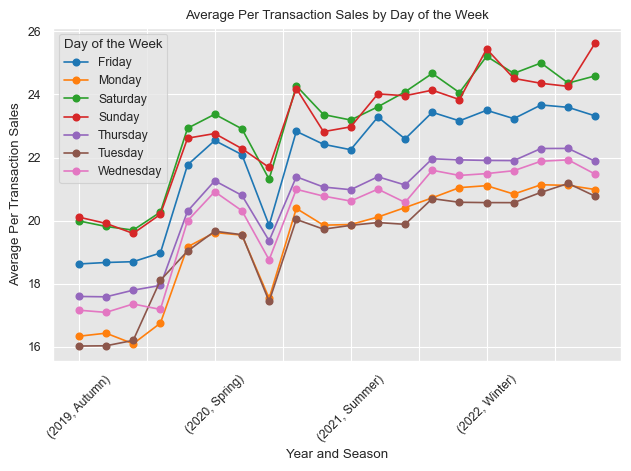

In [491]:
pivot_df = pd.pivot_table(df, index=['YEAR', 'SEASON_NAME'], columns='DAY_NAME', values='PER_TRANSACTION_SALES', aggfunc='mean')

# Plotting
pivot_df.plot(kind='line', marker='o')
plt.title('Average Per Transaction Sales by Day of the Week')
plt.xlabel('Year and Season')
plt.ylabel('Average Per Transaction Sales')
plt.legend(title='Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

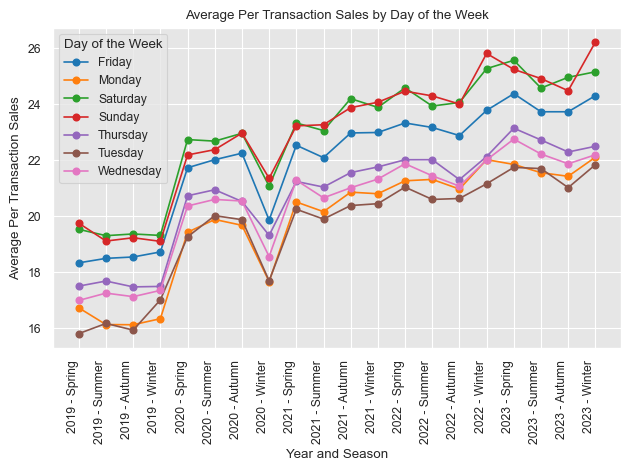

In [497]:
pivot_df = pd.pivot_table(data, index=['YEAR', 'SEASON_NAME'], columns='DAY_NAME', values='PER_TRANSACTION_SALES', aggfunc='mean')

# Define the order of seasons
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Reindex the pivot table to ensure correct season order for each year
pivot_df = pivot_df.reindex(index=pd.MultiIndex.from_product([pivot_df.index.get_level_values('YEAR').unique(), season_order], names=['YEAR', 'SEASON_NAME']))

# Plotting
ax = pivot_df.plot(kind='line', marker='o')
plt.title('Average Per Transaction Sales by Day of the Week')
plt.xlabel('Year and Season')
plt.ylabel('Average Per Transaction Sales')
plt.legend(title='Day of the Week')

# Custom x-axis labels
labels = [f"{year} - {season}" for year, season in pivot_df.index]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90, ha='right')

plt.tight_layout()
plt.show()

In [500]:
pd.pivot_table(data = data,
               index = 'SEASON_NAME',
               columns = ['DAY_NAME','PROMOTION_TYPE'],
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean')

DAY_NAME             Friday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON_NAME                                                            
Autumn            23.197184  23.866175    21.913607        22.833277   
Spring            22.862465  24.320557    22.016253        24.729904   
Summer                  NaN  23.623049    21.662144        23.881569   
Winter                  NaN  24.206734    22.337912        23.021402   

DAY_NAME             Monday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON_NAME                                                            
Autumn            20.690603  21.404720    19.668802        21.351463   
Spring            20.319204  21.899050    20.100601        21.748722   
Summer                  NaN  21.287861    19.597574        21.869268   
Winter                  NaN  22.286747    20.165615        20.743620   

DAY_NAME           Saturday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON_NAME                                                            
Autumn            26.896475  24.984364    22.894123        24.516022   
Spring            24.096653  25.470127    22.987305        25.891525   
Summer                  NaN  24.649345    22.378077        24.812479   
Winter                  NaN  25.404797    23.291809        24.143398   

DAY_NAME             Sunday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON_NAME                                                            
Autumn            24.652758  24.544495    22.733822        23.900301   
Spring            23.976522  25.054308    22.825006        26.213369   
Summer                  NaN  25.202366    22.497528        24.800274   
Winter                  NaN  25.130201    23.860994        25.280569   

DAY_NAME           Thursday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON_NAME                                                            
Autumn            21.387503  22.418060    20.416721        21.887629   
Spring            21.469997  23.047230    20.951324        23.305449   
Summer                  NaN  22.567339    20.631840        22.947124   
Winter                  NaN  22.377615    21.056095        21.286751   

DAY_NAME            Tuesday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON_NAME                                                            
Autumn            20.239176  20.842085    19.496288        21.178915   
Spring            20.153030  21.626928    19.792969        22.537636   
Summer                  NaN  21.196968    19.358154        22.483236   
Winter                  NaN  21.021381    20.024839              NaN   

DAY_NAME          Wednesday                                           
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount  
SEASON_NAME                                                           
Autumn            21.806324  21.684212    19.832150        21.893824  
Spring            20.735798  22.825590    20.788425        23.022915  
Summer                  NaN  22.014128    20.205330        22.507040  
Winter                  NaN  22.161108    20.687666              NaN

In [501]:
pd.pivot_table(data = data,
               index = 'SEASON_NAME',
               columns = 'PROMOTION_TYPE',
               values = 'PER_TRANSACTION_SALES',
               aggfunc = 'mean')

PROMOTION_TYPE,Delivery Fee,Free Item,No Promotion,Overall Discount
SEASON_NAME,,,,
Autumn,22.053230,22.917959,21.033472,22.335020
Spring,22.277641,23.462805,21.281115,24.098618
Summer,NaN,23.018967,20.898605,23.246435
Winter,NaN,23.567432,21.571127,23.702629


In [502]:
pd.pivot_table(data = data,
               index = 'SEASON_NAME',
               columns = 'PROMOTION_TYPE',
               values = 'NET_SALES_FINAL_USD_AMOUNT',
               aggfunc = 'mean')

PROMOTION_TYPE,Delivery Fee,Free Item,No Promotion,Overall Discount
SEASON_NAME,,,,
Autumn,5926.526316,7062.245714,6041.642241,5893.009524
Spring,6314.837398,6898.071895,5938.967823,7323.675439
Summer,NaN,6371.269341,5844.465453,6346.950658
Winter,NaN,7634.042735,5768.102617,7870.666667


In [509]:
pd.pivot_table(data = DATA,
               index = 'SEASON_NAME',
               columns = 'PROMOTION_TYPE',
               values = 'NET_SALES_FINAL_USD_AMOUNT',
               aggfunc = 'mean')

PROMOTION_TYPE,Delivery Fee,Free Item,No Promotion,Overall Discount
SEASON_NAME,,,,
Autumn,5652.974118,6742.744521,5375.314696,5222.282976
Spring,5735.509927,6246.726124,5191.678548,6693.040340
Summer,NaN,6151.148470,5170.091479,5829.507310
Winter,NaN,6980.099585,5318.997920,7209.899573


In [506]:
df['DMA_NAME'].value_counts()

DMA_NAME
LOS ANGELES                   84980
DALLAS-FT. WORTH              47528
HOUSTON                       34040
CHICAGO                       33078
NEW YORK                      21858
                              ...  
GRAND RAPIDS-KALMZOO-B.CRK      305
SPOKANE                         257
NEW ORLEANS                     141
ROCHESTER, NY                    34
INDIANAPOLIS                     27
Name: count, Length: 98, dtype: int64

In [508]:
DATA = df[df['DMA_NAME'] == 'LOS ANGELES']

In [510]:
CHICAGO = df[df['DMA_NAME'] == 'CHICAGO']

In [515]:
df[df['STATE_NAME'] == 'OREGON']

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,IS_A_HOLIDAY,MONTH_NAME,DAY_NAME,SEASON_NAME,YEAR,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_NAME,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_TRANSACTION_SALES,ROLLING_WINDOW_OF_7_DAYS,ROLLING_WINDOW_OF_14_DAYS,ROLLING_WINDOW_OF_30_DAYS,ROLLING_WINDOW_OF_60_DAYS,ROLLING_WINDOW_OF_90_DAYS,ROLLING_WINDOW_OF_180_DAYS,ROLLING_WINDOW_OF_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PY_PER_TRANSACTION_SALES,SALES_ROLLING_WINDOW_7_DAYS,PY_SALES_ROLLING_WINDOW_14_DAYS,PY_SALES_ROLLING_WINDOW_30_DAYS,PY_SALES_ROLLING_WINDOW_60_DAYS,PY_SALES_ROLLING_WINDOW_90_DAYS,PY_SALES_ROLLING_WINDOW_180_DAYS,PY_SALES_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_COVERAGE
BUSINESS_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-11,2326,1547,OR1547,FRANCHISE,2020-03-11,1999-12-31,0,March,Wednesday,Spring,2020,BEAVERTON,OR,OREGON,PACIFIC,820,"PORTLAND, OR",ACTIVE,4,WEST,0,2020-03-11,OPERATIONAL,Domestic,DOMESTICFRANCHISE,"PORTLAND, OR",2020-03-24,2020-03-25,2020-09-27,ORIGINAL,2022-07-20,0,0,74,2020,2019,0,408,7580,18.578432,7580,7580,7580,7580,7580,7580,7580,408,408,408,408,408,408,18.578432,18.578432,18.578432,18.578432,18.578432,18.578432,18.578432,408,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Promotion,No Offers,No Items,0,0.0,No Platform,None,None
2020-03-12,2326,1547,OR1547,FRANCHISE,2020-03-11,1999-12-31,0,March,Thursday,Spring,2020,BEAVERTON,OR,OREGON,PACIFIC,820,"PORTLAND, OR",ACTIVE,4,WEST,0,2020-03-11,OPERATIONAL,Domestic,DOMESTICFRANCHISE,"PORTLAND, OR",2020-03-24,2020-03-25,2020-09-27,ORIGINAL,2022-07-20,0,0,75,2020,2019,0,449,7939,17.681515,7759,7759,7759,7759,7759,7759,7759,428,428,428,428,428,428,18.129972,18.129972,18.129972,18.129972,18.129972,18.129972,18.129972,428,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Promotion,No Offers,No Items,0,0.0,No Platform,None,None
2020-03-13,2326,1547,OR1547,FRANCHISE,2020-03-11,1999-12-31,0,March,Friday,Spring,2020,BEAVERTON,OR,OREGON,PACIFIC,820,"PORTLAND, OR",ACTIVE,4,WEST,0,2020-03-11,OPERATIONAL,Domestic,DOMESTICFRANCHISE,"PORTLA

In [516]:
df['STATE_NAME'].nunique()

38

TRANSACTION_FINAL_COUNT          0.949252
ROLLING_WINDOW_OF_7_DAYS         0.832439
ROLLING_WINDOW_OF_30_DAYS        0.830830
ROLLING_WINDOW_OF_14_DAYS        0.825713
ROLLING_WINDOW_OF_60_DAYS        0.816173
                                   ...   
PROJECTION_INCLUDED_INDICATOR   -0.005334
STORE_KEY                       -0.014130
IS_A_HOLIDAY                    -0.040300
TEMP_CLOSE_INDICATOR            -0.206048
STORE_NUMBER                    -0.208250
Name: NET_SALES_FINAL_USD_AMOUNT, Length: 62, dtype: float64


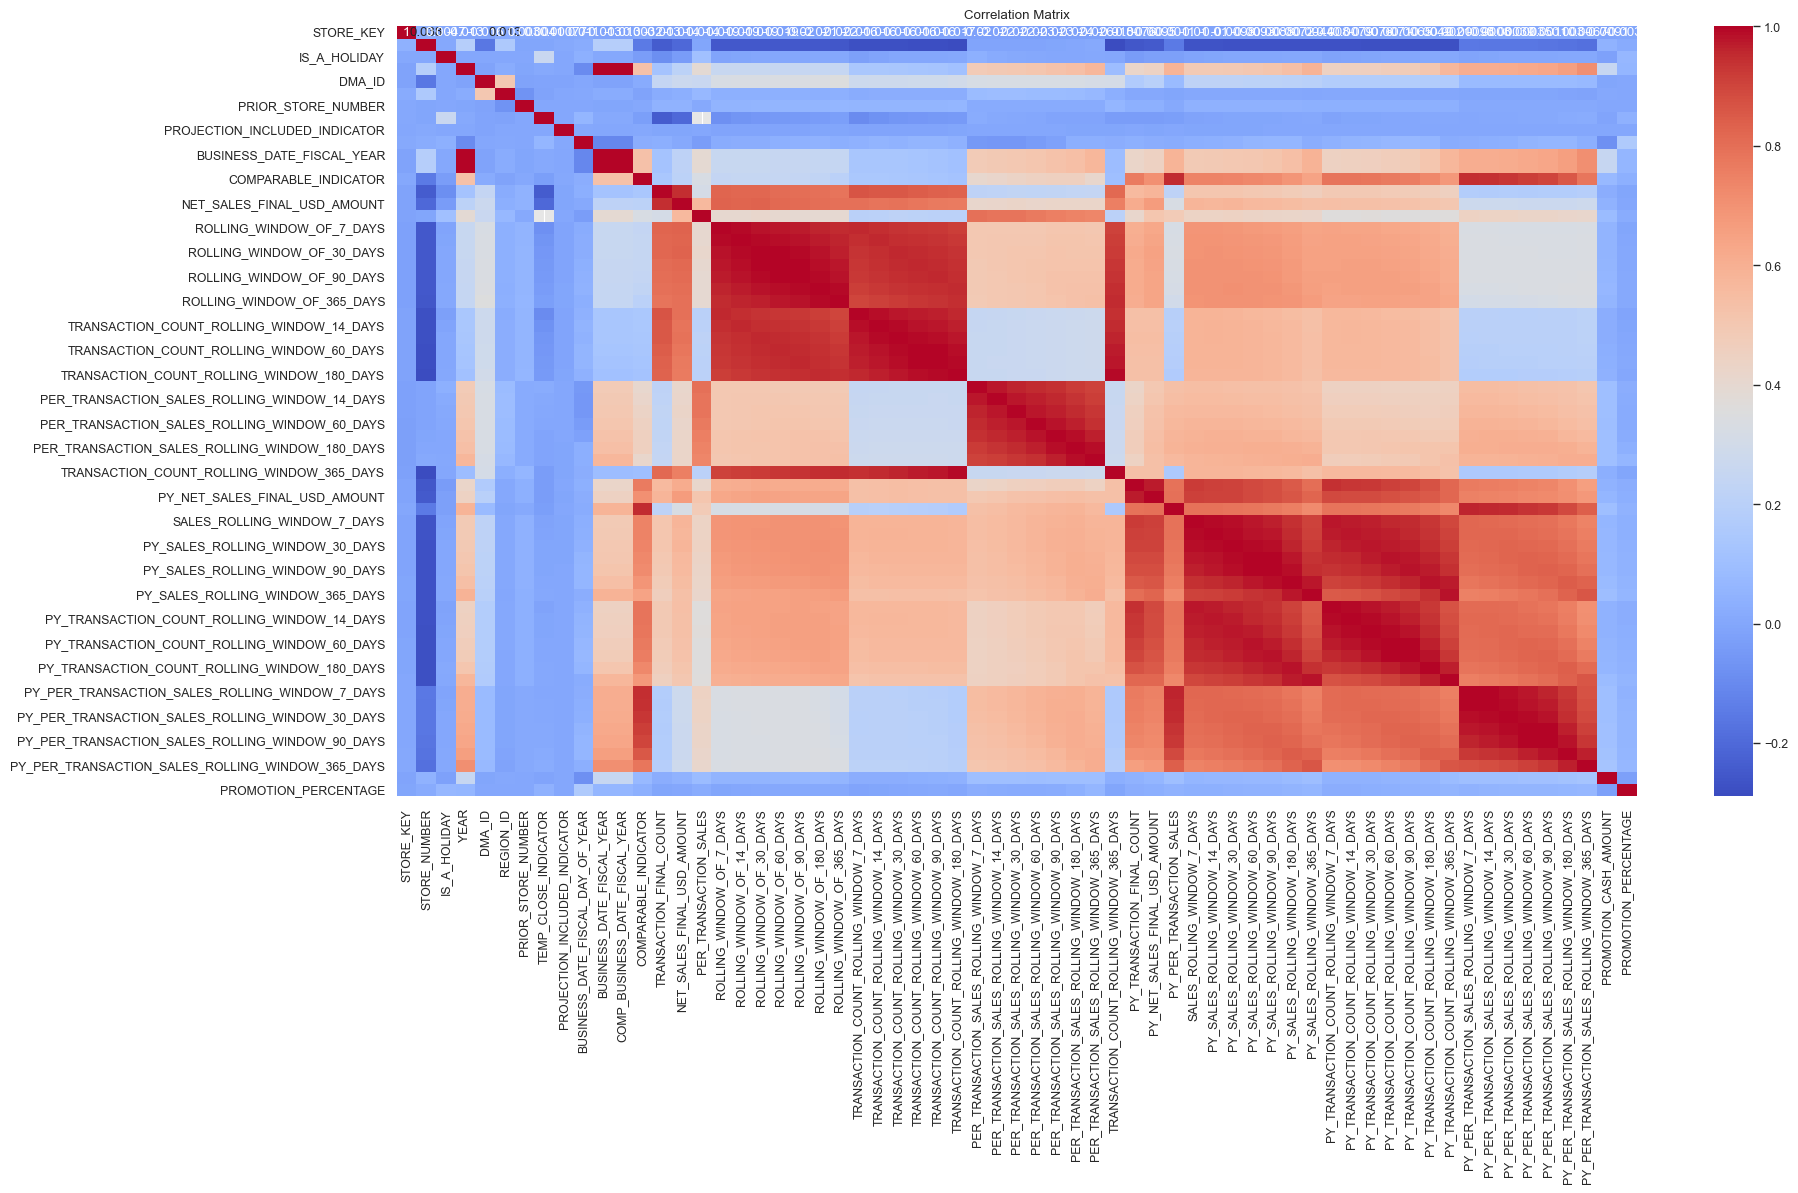

In [518]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()['NET_SALES_FINAL_USD_AMOUNT']

# Remove the target variable itself from the correlation matrix
correlation_matrix = correlation_matrix.drop('NET_SALES_FINAL_USD_AMOUNT')

# Sort the correlations in descending order
correlation_matrix_sorted = correlation_matrix.sort_values(ascending=False)

# Print the sorted correlations
print(correlation_matrix_sorted)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [520]:
top_20_features = correlation_matrix_sorted.head(50)

print(top_20_features)

TRANSACTION_FINAL_COUNT                             0.949252
ROLLING_WINDOW_OF_7_DAYS                            0.832439
ROLLING_WINDOW_OF_30_DAYS                           0.830830
ROLLING_WINDOW_OF_14_DAYS                           0.825713
ROLLING_WINDOW_OF_60_DAYS                           0.816173
ROLLING_WINDOW_OF_90_DAYS                           0.809304
ROLLING_WINDOW_OF_180_DAYS                          0.802421
TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS             0.794606
ROLLING_WINDOW_OF_365_DAYS                          0.793919
TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS            0.791293
TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS            0.788159
TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS            0.779206
TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS            0.772833
TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS           0.765823
TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS           0.755811
PY_NET_SALES_FINAL_USD_AMOUNT                       0.672353
PY_TRANSACTION_FINAL_COU

In [521]:
df

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,IS_A_HOLIDAY,MONTH_NAME,DAY_NAME,SEASON_NAME,YEAR,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_NAME,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PER_TRANSACTION_SALES,ROLLING_WINDOW_OF_7_DAYS,ROLLING_WINDOW_OF_14_DAYS,ROLLING_WINDOW_OF_30_DAYS,ROLLING_WINDOW_OF_60_DAYS,ROLLING_WINDOW_OF_90_DAYS,ROLLING_WINDOW_OF_180_DAYS,ROLLING_WINDOW_OF_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PY_PER_TRANSACTION_SALES,SALES_ROLLING_WINDOW_7_DAYS,PY_SALES_ROLLING_WINDOW_14_DAYS,PY_SALES_ROLLING_WINDOW_30_DAYS,PY_SALES_ROLLING_WINDOW_60_DAYS,PY_SALES_ROLLING_WINDOW_90_DAYS,PY_SALES_ROLLING_WINDOW_180_DAYS,PY_SALES_ROLLING_WINDOW_365_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_7_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_14_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_30_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_60_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_90_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_180_DAYS,PY_TRANSACTION_COUNT_ROLLING_WINDOW_365_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_7_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_14_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_30_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_60_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_90_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_180_DAYS,PY_PER_TRANSACTION_SALES_ROLLING_WINDOW_365_DAYS,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_COVERAGE
BUSINESS_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-23,825,2,TX2,FRANCHISE,1998-05-09,1999-12-31,0,April,Tuesday,Spring,2019,IRVING,TX,TEXAS,CENTRAL,623,DALLAS-FT. WORTH,ACTIVE,1,SOUTHWEST,0,1998-05-09,OPERATIONAL,Domestic,DOMESTICFRANCHISE,DALLAS-FT. WORTH,2019-04-17,2019-04-17,2020-09-27,ORIGINAL,2022-07-20,0,0,115,2019,2018,0,109,1809,16.596331,1809,1809,1809,1809,1809,1809,1809,109,109,109,109,109,109,16.596331,16.596331,16.596331,16.596331,16.596331,16.596331,16.596331,109,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Promotion,No Offers,No Items,0,0.0,No Platform,None,None
2019-04-24,825,2,TX2,FRANCHISE,1998-05-09,1999-12-31,0,April,Wednesday,Spring,2019,IRVING,TX,TEXAS,CENTRAL,623,DALLAS-FT. WORTH,ACTIVE,1,SOUTHWEST,0,1998-05-09,OPERATIONAL,Domestic,DOMESTICFRANCHISE,DALLAS-FT. WORTH,2019-04-17,2019-04-17,2020-09-27,ORIGINAL,2022-07-20,0,0,116,2019,2018,0,93,1465,15.752688,1637,1637,1637,1637,1637,1637,1637,101,101,101,101,101,101,16.174509,16.174509,16.174509,16.174509,16.174509,16.174509,16.174509,101,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Promotion,No Offers,No Items,0,0.0,No Platform,None,None
2019-04-25,825,2,TX2,FRANCHISE,1998-05-09,1999-12-31,0,April,Thursday,Spring,2019,IRVING,TX,TEXAS,CENTRAL,623,DALLAS-FT. WORTH,ACTIVE,1,SOUTHWEST,0,1998-05-09,OPERATIONAL,Domestic,DOMESTICFRANCHISE,DALLAS-FT. WO

In [522]:
df.columns

Index(['STORE_KEY', 'STORE_NUMBER', 'STORE_NAME', 'STORE_TYPE_NAME',
       'OPEN_DATE', 'CLOSE_DATE', 'IS_A_HOLIDAY', 'MONTH_NAME', 'DAY_NAME',
       'SEASON_NAME', 'YEAR', 'CITY_NAME', 'STATE_CODE', 'STATE_NAME',
       'TIME_ZONE_NAME', 'DMA_ID', 'DMA_NAME', 'STORE_STATUS', 'REGION_ID',
       'REGION_NAME', 'PRIOR_STORE_NUMBER', 'STORE_LIVE_DATE',
       'STORE_FUNCTIONAL_STATUS', 'GLOBAL_REGION_NAME',
       'GLOBAL_REGION_STORE_TYPE_NAME', 'AREA_REGION', 'DISPATCH_GO_LIVE_DATE',
       'DOOR_DASH_GO_LIVE_DATE', 'DOOR_DASH_MARKUP_GO_LIVE_DATE',
       'STORE_CONCEPT_NAME', 'UBER_EATS_MARKUP_DATE', 'TEMP_CLOSE_INDICATOR',
       'PROJECTION_INCLUDED_INDICATOR', 'BUSINESS_DATE_FISCAL_DAY_OF_YEAR',
       'BUSINESS_DATE_FISCAL_YEAR', 'COMP_BUSINESS_DATE_FISCAL_YEAR',
       'COMPARABLE_INDICATOR', 'TRANSACTION_FINAL_COUNT',
       'NET_SALES_FINAL_USD_AMOUNT', 'PER_TRANSACTION_SALES',
       'ROLLING_WINDOW_OF_7_DAYS', 'ROLLING_WINDOW_OF_14_DAYS',
       'ROLLING_WINDOW_OF_30_DAYS',

In [525]:
!pip install xgboost
!pip install shap

  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-win_amd64.whl (124.9 MB)
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/456.1 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 174.1/456.1 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.1 kB 2.3 MB/s eta 0:00:01
   -------------------------------------- - 440.3/456.1 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 2.4 MB/s eta 0:00:00


In [535]:
df1 = df.copy()